<a href="https://colab.research.google.com/github/Amzilynn/Geoepidemiology-Profiling/blob/main/Geoepidemiology_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enviroment Based Disease Profiling

**Core Objective**
Discover universal environmental risk profiles from satellite data without using any disease information.


1.    **Step 1: Data Collection & Feature Extraction**

Input: Raw satellite observations (temperature, rainfall, water, vegetation, air quality, land use)

Process: Transform pixels into disease-relevant features:

*  Sea Surface Temperature (SST)

*  Chlorophyll concentration (water quality)

*  Flooded area percentage

*  Aerosol density (air pollution)

*  NDVI (vegetation health)

*  Urban heat intensity

Output: Environmental feature vectors per location and time

2.   **Step 2: Environmental Clustering (The Core Innovation)**

Method: Unsupervised clustering (K-Means/DBSCAN/HDBSCAN)

Key: Uses ONLY environmental features (no disease data!)

Result: Discovers natural groupings of environmental conditions:

*  Profile 1: Warm + Flooded + Nutrient-rich water

*  Profile 2: Hot + Dry + Low vegetation

*  Profile 3: Urban + Polluted air + Heat island

*  Profile 4: Standing water + Vegetation + Heat

*  Profile 5: Cold + Humid + Forested


3.  **Step 3: Profile Interpretation
Mapping**:

Each profile gets linked to disease groups based on biological plausibility:

*  Warm+Flooded → Waterborne diseases

*  Standing water+Heat → Vector-borne diseases

*  Urban+Polluted → Respiratory diseases

*  Dry+Crop stress → Nutritional diseases

*  Deforestation+Wildlife → Zoonotic diseases










Regions (Bangladesh, Sahel, Amazon, Beijing, California)
         
         ↓ (sample multiple points, weekly)

Environmental Samples (Climate, Water, Air, Land, Human)

         ↓ (cluster analysis)

Profiles (5 clusters of similar environmental conditions)

         ↓ (map historical disease data)

Disease Families Assigned to Each Profile

         ↓ (map to locations for visualization & early warning)

Predictions (future environmental conditions → profile → risk)


## Data Collection

1. **Define the 5 Environmental Axes**


We define five satellite-observable environmental axes (climate, water, air, land, human exposure).









| **Environmental Axis**     | **Example Variables**                                 | **Satellite / Data Source**                                                                         | **Resolution / Frequency**                         | **Why This Matters (Evidence)**                                                                                                                                                              |
| -------------------------- | ----------------------------------------------------- | --------------------------------------------------------------------------------------------------- | -------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Climate**                | Temperature, Rainfall, Humidity                       | MODIS LST (land surface temp), GPM / IMERG (precipitation), ERA5 (climate reanalysis)               | MODIS: ~1km daily; GPM: ~10km hourly; ERA5: ~0.25° | Climate variables like rainfall, temperature, humidity influence disease incidence (e.g., cholera, vector-borne) and are used in health models. ([NASA Global Precipitation Measurement][1]) |
| **Water**                  | Flooding, Standing water, Soil moisture, River levels | Sentinel-1 SAR (flood detection), Landsat (water surfaces), SMAP (soil moisture), Global Flood Maps | Sentinel-1: 10–30m; Landsat: 30m; SMAP: ~9km       | Water conditions and flooding are linked to waterborne disease risk (e.g., cholera, diarrheal diseases). ([disasters.nasa.gov][2])                                                           |
| **Air**                    | Pollution, Aerosols, Dust, Smoke                      | Sentinel-5P (NO₂, SO₂, CO, aerosols), MODIS/VIIRS (aerosol optical depth, fire detection)           | ~7–10km daily                                      | Air pollution and dust influence respiratory illnesses. NASA and WHO studies link satellite air data with health impacts. ([disasters.nasa.gov][3])                                          |
| **Land**                   | Vegetation, Land cover, Urbanization                  | Sentinel-2 (NDVI, land cover), MODIS (vegetation indices), Copernicus Land Cover                    | Sentinel-2: 10–30m; MODIS: 250–500m                | Vegetation and land cover affect vector habitats and environmental context for disease. Satellite land indices are used in disease ecology. ([NASA Science][4])                              |
| **Human / Socio-economic** | Population density, Sanitation proxies, Urban extent  | WorldPop, LandScan, OpenStreetMap, VIIRS night lights                                               | ~100m–1km                                          | Human exposure, density, and infrastructure shape disease risk; these data are used as socioeconomic risk predictors in health models. ([Number Analytics][5])                               |

[1]: https://gpm.nasa.gov/applications/health?utm_source=chatgpt.com "Using GPM Data for Development and Public Health | NASA Global Precipitation Measurement Mission"
[2]: https://disasters.nasa.gov/get-involved/training/english/arset-application-earth-observations-assessing-waterborne-disease?utm_source=chatgpt.com "ARSET - The Application of Earth Observations for Assessing Waterborne Disease Risk | NASA Applied Sciences"
[3]: https://disasters.nasa.gov/sites/default/files/2019-09/Health_Air_Quality_2017_Annual_Summary.pdf?utm_source=chatgpt.com "Health & Air Quality: 2017 Annual Summary"
[4]: https://science.nasa.gov/earth/earth-observatory/tracking-disease-by-satellite/?utm_source=chatgpt.com "Of Mosquitoes and Models: Tracking Disease by Satellite - NASA Science"
[5]: https://www.numberanalytics.com/blog/uncovering-environmental-risk-factors?utm_source=chatgpt.com "Uncovering Environmental Risk Factors"


2. **Choosing the Locations**

--> Within the region we can observe variation along multiple axes.

| Region     | Why Chosen                       | Axes Covered                              |
| ---------- | -------------------------------- | ----------------------------------------- |
| Bangladesh | Floods, rivers, dense population | Climate, Water, Human, Land, Air          |
| Sahel      | Arid, dust, desert → savanna     | Climate, Air, Land, Human, Water (sparse) |
| Amazon     | Rainforest, rivers               | Climate, Water, Land, Human               |
| Beijing    | Urban, pollution hotspot         | Climate, Air, Land, Human                 |
| California | Wildfires, mixed climate         | Climate, Air, Land, Water, Human          |




**Specific Regions in each country**

| **Region**                       | **Why It Makes Sense for Profiling (Axes Covered)**                                | **Evidence / Reasoning**                                                                                                                                                                            |
| -------------------------------- | ---------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Bangladesh (Ganges Delta)**    | Hot, humid, frequent flooding, dense population → climate, water, human, land, air | Heavy rainfall & flooding shape waterborne disease patterns such as cholera. Satellites have been used to assess environmental risk here. ([PMC][1])                                                |
| **Sahara / Sahel (West Africa)** | Arid, dust events, temperature extremes → climate, air, land, human                | Dust and climate variables show strong seasonal links to meningitis and other respiratory stress conditions. ([NASA Science][2])                                                                    |
| **Amazon Basin (Brazil/Peru)**   | Wet tropical, dense vegetation, standing water → climate, water, land, human       | Tropical forests with rainfall gradients are classic vector habitats; NASA uses similar data to map mosquito risk zones. ([NASA Global Precipitation Measurement][3])                               |
| **Beijing / Northern China**     | Urban pollution hotspot → climate, air, land, human                                | Air quality extremes and urbanization correlate with respiratory disease burdens; satellite NO₂/PM data are widely used in air-health studies. ([Organisation mondiale de la santé][4])             |
| **California / Western US**      | Mixed fire, drought, wildfire smoke → climate, air, land, water                    | Wildfire smoke and drought conditions are linked with respiratory issues; satellite aerosol data are used for forecasting smoke plumes and health impacts. ([Organisation mondiale de la santé][4]) |

[1]: https://pmc.ncbi.nlm.nih.gov/articles/PMC12699975/?utm_source=chatgpt.com "Exploring Climate Links and Clinical Association of the Diarrheal Disease Using Data From an Upsurge in Dhaka, Bangladesh: A Cross‐Sectional Study - PMC"
[2]: https://science.nasa.gov/humans-in-space/why-go-to-space/benefits-back-on-earth/climate-conditions-help-forecast-meningitis-outbreaks/?utm_source=chatgpt.com "Climate conditions help forecast meningitis outbreaks - NASA Science"
[3]: https://gpm.nasa.gov/applications/health?utm_source=chatgpt.com "Using GPM Data for Development and Public Health | NASA Global Precipitation Measurement Mission"
[4]: https://www.who.int/news/item/11-11-2017-worldwide-health-risks-related-to-climate-change-are-on-the-rise?utm_source=chatgpt.com "Worldwide health risks related to climate change are on the rise"


**We will collect 3 years old weekly dataset for all of the features that define differnt Enviromental axies according to the specific region**

**We will use GEE : https://developers.google.com/earth-engine/datasets?hl=fr  to exctract the Data**

In [23]:
!pip install earthengine-api
!pip install earthengine-api


In [24]:
import ee
ee.Authenticate()
ee.Initialize(project='geoepidemiology-profiling')

In [25]:
print("GEE initialized:", ee.String('Hello from Earth Engine!').getInfo())


GEE initialized: Hello from Earth Engine!


### Select specific Location corrdinates

In [26]:
import ee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings



# Define regions
regions = {
    'Bangladesh_Ganges': ee.Geometry.Rectangle([88.5, 22.5, 90.5, 24.5]),
    'Sahel_Mali': ee.Geometry.Rectangle([-5.0, 13.0, -1.0, 16.0]),
    'Amazon_Peru': ee.Geometry.Rectangle([-74.0, -6.0, -71.0, -3.0]),
    'Beijing_China': ee.Geometry.Rectangle([116.0, 39.5, 117.0, 40.5]),
    'California_Central': ee.Geometry.Rectangle([-121.0, 36.5, -119.5, 38.0])
}

# Define date ranges for each year
years = {
    2022: (datetime(2022, 1, 1), datetime(2022, 12, 31)),
    2023: (datetime(2023, 1, 1), datetime(2023, 12, 31)),
    2024: (datetime(2024, 1, 1), datetime(2024, 12, 31))
}



**MODIS LST (LAND SURFACE TEMPERATURE) - 8-DAY COMPOSITE**

In [37]:
# MODIS LST Collection
modis_lst = ee.ImageCollection('MODIS/061/MOD11A2') \
    .select(['LST_Day_1km', 'LST_Night_1km', 'QC_Day', 'QC_Night'])

def get_modis_year_data(region_name, region_geom, year):
    """Get MODIS data for a specific region and year"""
    start_date, end_date = years[year]

    # Filter collection
    filtered = modis_lst.filterBounds(region_geom) \
                       .filterDate(start_date.strftime('%Y-%m-%d'),
                                  end_date.strftime('%Y-%m-%d'))

    count = filtered.size().getInfo()

    if count == 0:
        print(f"No data for {region_name} in {year}")
        return pd.DataFrame()

    # Get images and dates
    images = filtered.toList(count)
    dates = filtered.aggregate_array('system:time_start').getInfo()

    records = []
    for i, ts in enumerate(dates):
        date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')
        image = ee.Image(images.get(i))

        # Get statistics
        stats = image.reduceRegion(
            reducer=ee.Reducer.minMax().combine(
                reducer2=ee.Reducer.mean(), sharedInputs=True),
            geometry=region_geom,
            scale=1000,
            bestEffort=True,
            maxPixels=1e9
        ).getInfo()

        # Add metadata
        stats['date'] = date
        stats['region'] = region_name
        stats['satellite'] = 'MODIS'
        stats['year'] = str(year)
        stats['month'] = date[5:7]
        records.append(stats)

    df = pd.DataFrame(records)
    return df

def explore_dataframe(df, region_name, year):
    """Explore and print DataFrame information"""
    print(f"\n{'='*60}")
    print(f"EXPLORING: {region_name} - Year {year}")
    print(f"{'='*60}")

    if df.empty:
        print("DataFrame is empty!")
        return

    print(f"Shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Number of observations: {len(df)}")

    # Check for missing values
    print(f"\nMissing values per column:")
    missing = df.isnull().sum()
    for col, count in missing.items():
        if count > 0:
            print(f"  {col}: {count} missing")

    # Basic statistics for numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        print(f"\nBasic Statistics:")
        print(df[numerical_cols].describe().round(2))

    print(f"\nFirst 3 rows:")
    print(df.head(3))
    print(f"\nLast 3 rows:")
    print(df.tail(3))

    return df

## Bangladesh

**2022**

In [36]:
# Bangladesh 2022 Data
df_bang_2022 = get_modis_year_data(
    region_name='Bangladesh_Ganges',
    region_geom=regions['Bangladesh_Ganges'],
    year=2022
)

# Explore the data
df_bang_2022 = explore_dataframe(df_bang_2022, 'Bangladesh_Ganges', 2022)


/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Bangladesh_Ganges - Year 2022
Shape: (46, 17)
Date range: 2022-01-01 to 2022-12-27
Number of observations: 46

Missing values per column:
  LST_Day_1km_max: 1 missing
  LST_Day_1km_mean: 1 missing
  LST_Day_1km_min: 1 missing
  LST_Night_1km_max: 3 missing
  LST_Night_1km_mean: 3 missing
  LST_Night_1km_min: 3 missing
  QC_Day_max: 1 missing
  QC_Day_mean: 1 missing
  QC_Day_min: 1 missing
  QC_Night_max: 1 missing
  QC_Night_mean: 1 missing
  QC_Night_min: 1 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            45.00             45.00            45.00              43.00   
mean          15402.51          15030.84         14410.71           14941.12   
std             240.61            148.12           380.56             176.96   
min           14916.00          14718.54         13475.00           14558.00   
25%           15213.00          14927.10         14120.00           14814.50   
50%           154

**Day LST Time Series (2022)**

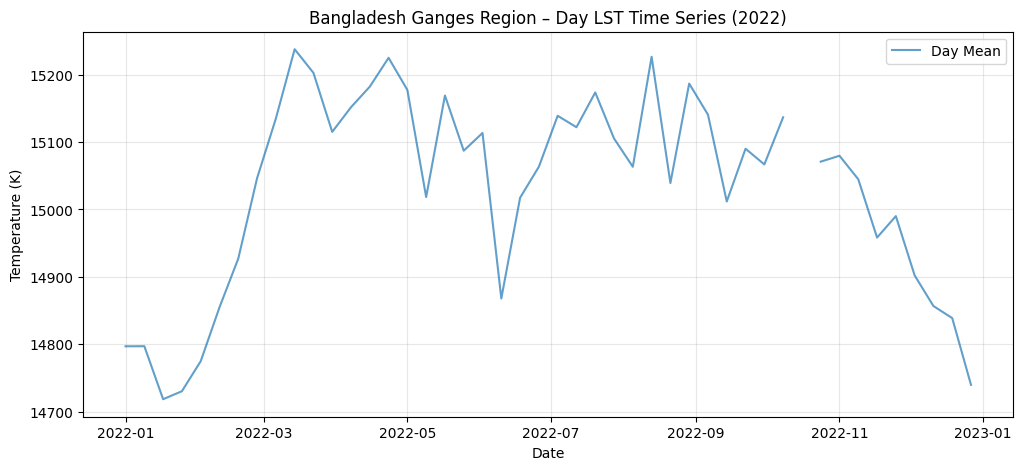

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

if not df_bang_2022.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(
        pd.to_datetime(df_bang_2022['date']),
        df_bang_2022['LST_Day_1km_mean'],
        alpha=0.7,
        label='Day Mean'
    )
    plt.title('Bangladesh Ganges Region – Day LST Time Series (2022)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No data available")


**Night LST Time Series (2022)**

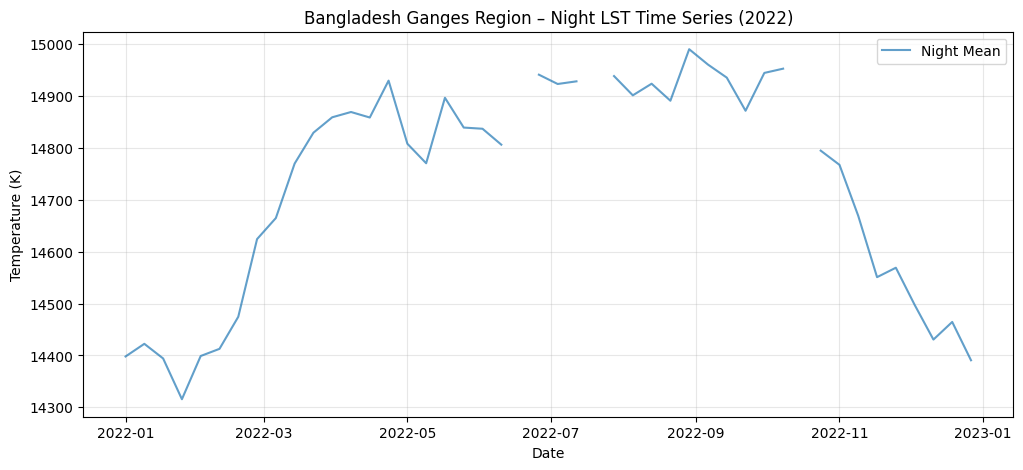

In [32]:
if not df_bang_2022.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(
        pd.to_datetime(df_bang_2022['date']),
        df_bang_2022['LST_Night_1km_mean'],
        alpha=0.7,
        label='Night Mean'
    )
    plt.title('Bangladesh Ganges Region – Night LST Time Series (2022)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No data available")


**Monthly Average Temperatures**

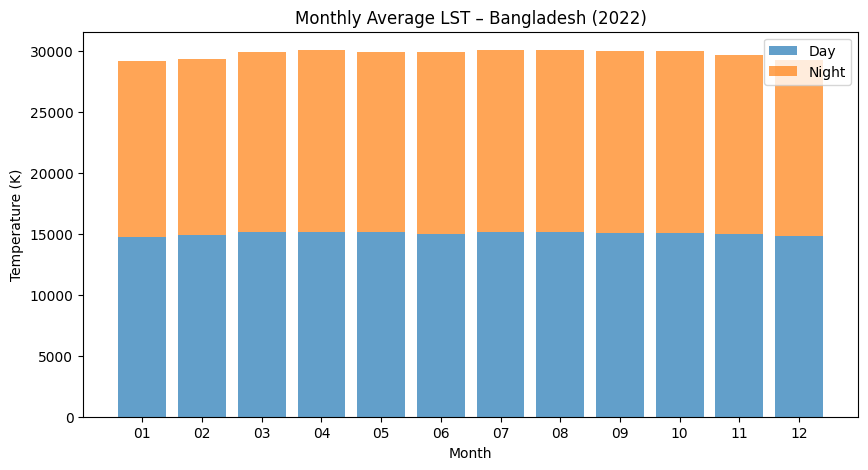

In [33]:
if not df_bang_2022.empty:
    monthly_avg = df_bang_2022.groupby('month').agg({
        'LST_Day_1km_mean': 'mean',
        'LST_Night_1km_mean': 'mean'
    }).reset_index()

    plt.figure(figsize=(10, 5))
    plt.bar(monthly_avg['month'], monthly_avg['LST_Day_1km_mean'], alpha=0.7, label='Day')
    plt.bar(
        monthly_avg['month'],
        monthly_avg['LST_Night_1km_mean'],
        alpha=0.7,
        label='Night',
        bottom=monthly_avg['LST_Day_1km_mean']
    )

    plt.title('Monthly Average LST – Bangladesh (2022)')
    plt.xlabel('Month')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.show()
else:
    print("No data available")


**Temperature Distribution (Histogram)**

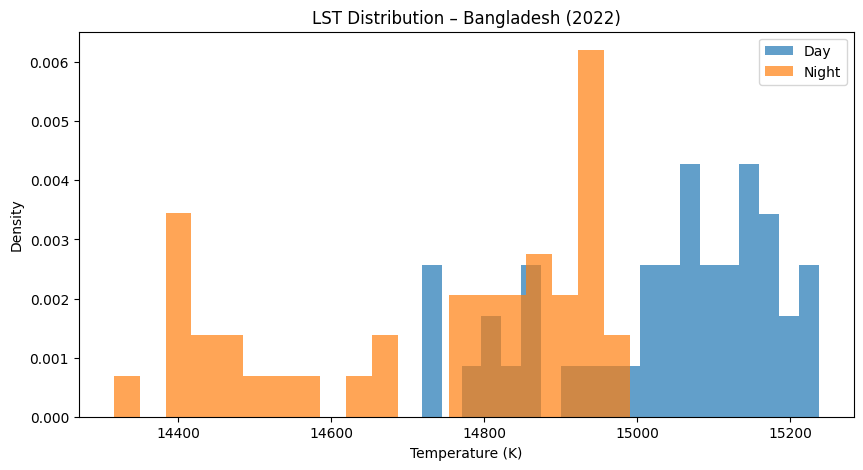

In [34]:
if not df_bang_2022.empty:
    plt.figure(figsize=(10, 5))
    plt.hist(df_bang_2022['LST_Day_1km_mean'], bins=20, alpha=0.7, label='Day', density=True)
    plt.hist(df_bang_2022['LST_Night_1km_mean'], bins=20, alpha=0.7, label='Night', density=True)

    plt.title('LST Distribution – Bangladesh (2022)')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("No data available")


In [35]:
if not df_bang_2022.empty:
    df_bang_2022.to_csv('bangladesh_modis_2022.csv', index=False)
    print("Data exported to bangladesh_modis_2022.csv")


Data exported to bangladesh_modis_2022.csv


**2023**

In [38]:
# Bangladesh 2023 Data
df_bang_2023 = get_modis_year_data(
    region_name='Bangladesh_Ganges',
    region_geom=regions['Bangladesh_Ganges'],
    year=2023
)

# Explore the data
df_bang_2023 = explore_dataframe(df_bang_2023, 'Bangladesh_Ganges', 2023)



/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Bangladesh_Ganges - Year 2023
Shape: (46, 17)
Date range: 2023-01-01 to 2023-12-27
Number of observations: 46

Missing values per column:
  LST_Night_1km_max: 1 missing
  LST_Night_1km_mean: 1 missing
  LST_Night_1km_min: 1 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              45.00   
mean          15407.39          15042.69         14531.37           14976.78   
std             267.05            163.95           351.96             175.23   
min           14919.00          14707.10         13861.00           14548.00   
25%           15230.50          14978.62         14201.75           14881.00   
50%           15435.00          15061.72         14636.00           15006.00   
75%           15596.25          15137.01         14829.75           15120.00   
max           15838.00          15343.31         15002.00           15200.00   

       LST_Night

**Day LST Time Series (2023 vs 2022)**

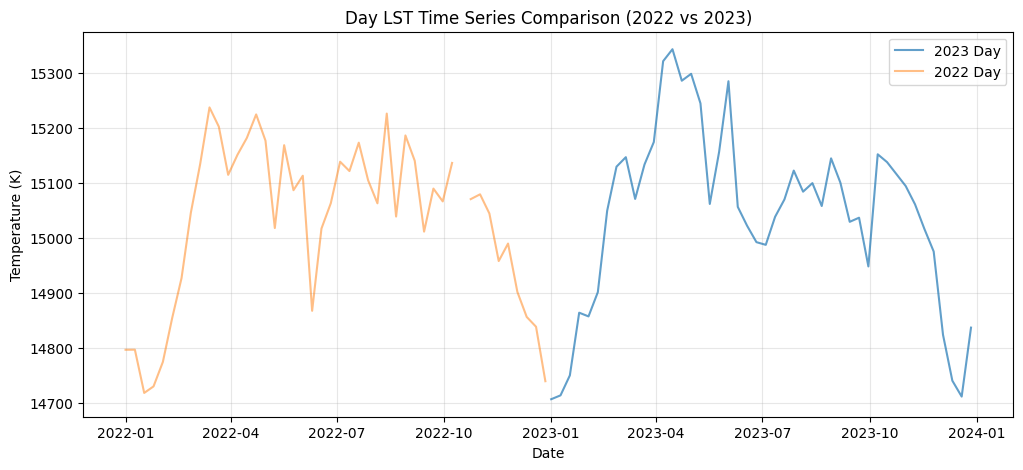

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

if not df_bang_2023.empty:
    plt.figure(figsize=(12, 5))

    plt.plot(
        pd.to_datetime(df_bang_2023['date']),
        df_bang_2023['LST_Day_1km_mean'],
        alpha=0.7,
        label='2023 Day'
    )

    if not df_bang_2022.empty:
        plt.plot(
            pd.to_datetime(df_bang_2022['date']),
            df_bang_2022['LST_Day_1km_mean'],
            alpha=0.5,
            label='2022 Day'
        )

    plt.title('Day LST Time Series Comparison (2022 vs 2023)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No data available")


**Monthly Day Temperature Comparison**

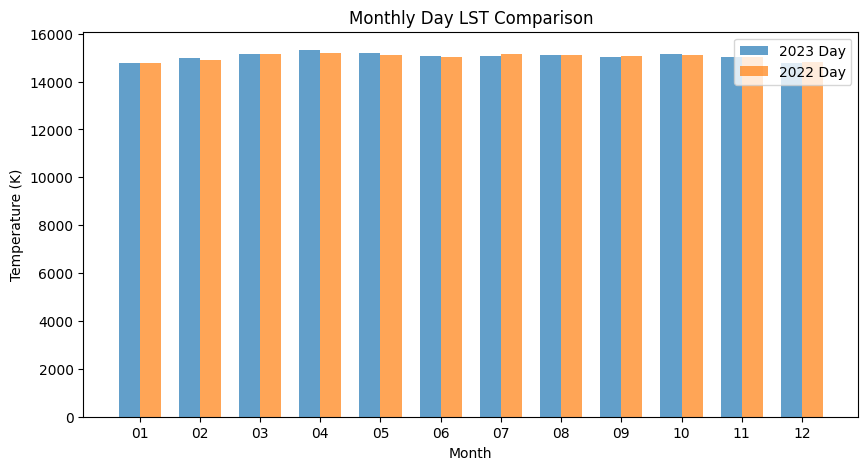

In [40]:
if not df_bang_2023.empty:
    monthly_2023 = df_bang_2023.groupby('month').agg({
        'LST_Day_1km_mean': 'mean'
    }).reset_index()

    x = np.arange(len(monthly_2023))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, monthly_2023['LST_Day_1km_mean'], width,
            alpha=0.7, label='2023 Day')

    if not df_bang_2022.empty:
        monthly_2022 = df_bang_2022.groupby('month').agg({
            'LST_Day_1km_mean': 'mean'
        }).reset_index()

        plt.bar(x + width/2, monthly_2022['LST_Day_1km_mean'], width,
                alpha=0.7, label='2022 Day')

    plt.title('Monthly Day LST Comparison')
    plt.xlabel('Month')
    plt.ylabel('Temperature (K)')
    plt.xticks(x, monthly_2023['month'])
    plt.legend()
    plt.show()
else:
    print("No data available")


**Temperature Distribution (2022 vs 2023)**

/tmp/ipython-input-1783241575.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(temp_data, labels=labels)


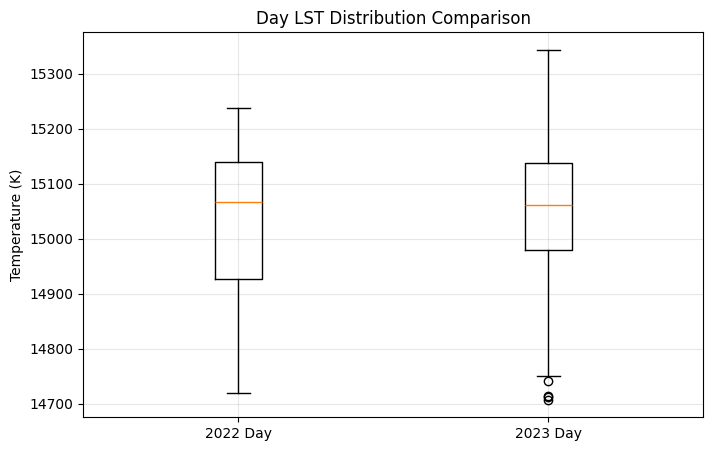

In [41]:
if not df_bang_2023.empty:
    temp_data = []
    labels = []

    if not df_bang_2022.empty:
        temp_data.append(df_bang_2022['LST_Day_1km_mean'].dropna())
        labels.append('2022 Day')

    temp_data.append(df_bang_2023['LST_Day_1km_mean'].dropna())
    labels.append('2023 Day')

    plt.figure(figsize=(8, 5))
    plt.boxplot(temp_data, labels=labels)
    plt.title('Day LST Distribution Comparison')
    plt.ylabel('Temperature (K)')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No data available")


In [46]:
if not df_bang_2023.empty:
    df_bang_2023.to_csv('bangladesh_modis_2023.csv', index=False)
    print(" Data exported to bangladesh_modis_2023.csv")


 Data exported to bangladesh_modis_2023.csv


**2024**

In [49]:
# Bangladesh 2024 Data
df_bang_2024 = get_modis_year_data(
    region_name='Bangladesh_Ganges',
    region_geom=regions['Bangladesh_Ganges'],
    year=2024
)

# Explore the data
df_bang_2024 = explore_dataframe(df_bang_2024, 'Bangladesh_Ganges', 2024)

/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Bangladesh_Ganges - Year 2024
Shape: (46, 17)
Date range: 2024-01-01 to 2024-12-26
Number of observations: 46

Missing values per column:
  LST_Night_1km_max: 4 missing
  LST_Night_1km_mean: 4 missing
  LST_Night_1km_min: 4 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              42.00   
mean          15358.80          15011.69         14476.98           14979.40   
std             298.17            194.47           344.30             198.86   
min           14857.00          14543.09         13449.00           14555.00   
25%           15169.75          14921.57         14334.25           14830.50   
50%           15349.50          15049.92         14526.50           15025.00   
75%           15542.25          15115.18         14708.50           15120.75   
max           16003.00          15392.86         15057.00           15312.00   

       LST_Night

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Collect all available years
all_years_data = []

if not df_bang_2022.empty:
    df_bang_2022['year'] = '2022'
    all_years_data.append(df_bang_2022)

if not df_bang_2023.empty:
    df_bang_2023['year'] = '2023'
    all_years_data.append(df_bang_2023)

if not df_bang_2024.empty:
    df_bang_2024['year'] = '2024'
    all_years_data.append(df_bang_2024)

if all_years_data:
    df_all_years = pd.concat(all_years_data, ignore_index=True)


**Yearly Average Temperature Trend (2022–2024)**

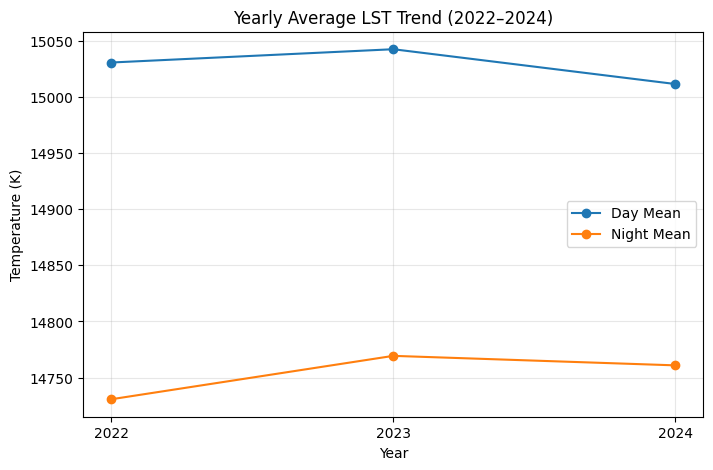

In [48]:
if 'df_all_years' in locals():
    yearly_avg = df_all_years.groupby('year').agg({
        'LST_Day_1km_mean': 'mean',
        'LST_Night_1km_mean': 'mean'
    }).reset_index()

    plt.figure(figsize=(8, 5))
    plt.plot(yearly_avg['year'], yearly_avg['LST_Day_1km_mean'], marker='o', label='Day Mean')
    plt.plot(yearly_avg['year'], yearly_avg['LST_Night_1km_mean'], marker='o', label='Night Mean')

    plt.title('Yearly Average LST Trend (2022–2024)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


**2024 Day LST Time Series + Trend Line**

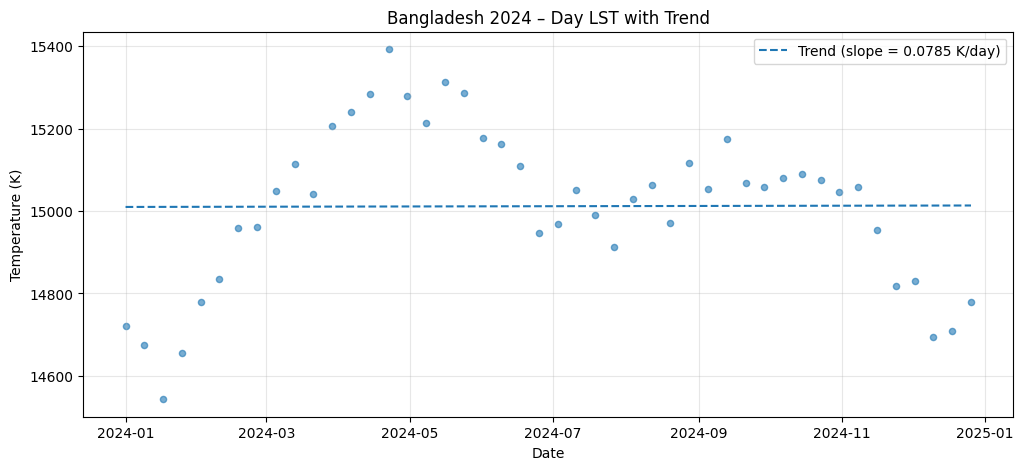

In [51]:
if not df_bang_2024.empty:
    dates_2024 = pd.to_datetime(df_bang_2024['date'])

    plt.figure(figsize=(12, 5))
    plt.scatter(dates_2024, df_bang_2024['LST_Day_1km_mean'], alpha=0.6, s=20)

    x_numeric = np.arange(len(df_bang_2024))
    z = np.polyfit(x_numeric, df_bang_2024['LST_Day_1km_mean'].dropna(), 1)
    p = np.poly1d(z)

    plt.plot(dates_2024, p(x_numeric), linestyle='--',
             label=f'Trend (slope = {z[0]:.4f} K/day)')

    plt.title('Bangladesh 2024 – Day LST with Trend')
    plt.xlabel('Date')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


**Monthly Seasonal Patterns (All Years)**

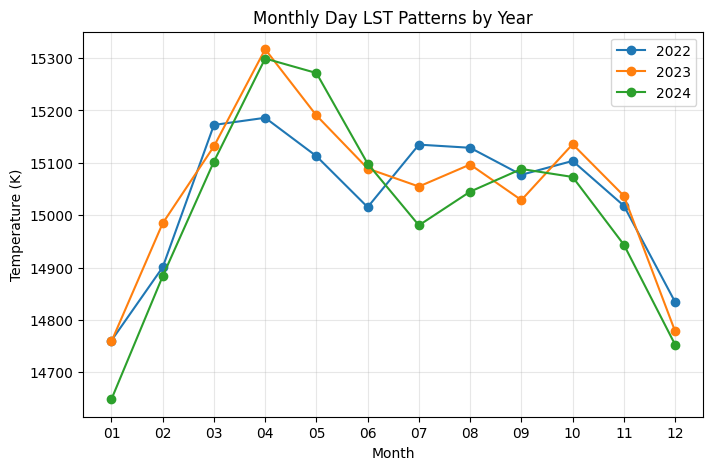

In [52]:
if 'df_all_years' in locals():
    monthly_all_years = df_all_years.groupby(['year', 'month']).agg({
        'LST_Day_1km_mean': 'mean'
    }).reset_index()

    plt.figure(figsize=(8, 5))

    for year in monthly_all_years['year'].unique():
        year_data = monthly_all_years[monthly_all_years['year'] == year]
        plt.plot(year_data['month'], year_data['LST_Day_1km_mean'], marker='o', label=year)

    plt.title('Monthly Day LST Patterns by Year')
    plt.xlabel('Month')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


**Combine & Save All Years**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Combine all Bangladesh years
df_bangladesh_all_years = pd.concat(
    [df_bang_2022, df_bang_2023, df_bang_2024],
    ignore_index=True
)

# Sort by date
df_bangladesh_all_years['date_dt'] = pd.to_datetime(df_bangladesh_all_years['date'])
df_bangladesh_all_years = df_bangladesh_all_years.sort_values('date_dt')

print("=" * 60)
print("FINAL COMBINED DATASET: BANGLADESH GANGES")
print("=" * 60)
print(f"Total records: {len(df_bangladesh_all_years):,}")
print(f"Date range: {df_bangladesh_all_years['date'].min()} → {df_bangladesh_all_years['date'].max()}")
print(f"Years covered: {sorted(df_bangladesh_all_years['year'].unique())}")
print(f"Columns: {df_bangladesh_all_years.columns.tolist()}")

# Save
df_bangladesh_all_years.to_csv('bangladesh_modis_all_years.csv', index=False)
print("\n Exported: bangladesh_modis_all_years.csv")


FINAL COMBINED DATASET: BANGLADESH GANGES
Total records: 138
Date range: 2022-01-01 → 2024-12-26
Years covered: ['2022', '2023', '2024']
Columns: ['LST_Day_1km_max', 'LST_Day_1km_mean', 'LST_Day_1km_min', 'LST_Night_1km_max', 'LST_Night_1km_mean', 'LST_Night_1km_min', 'QC_Day_max', 'QC_Day_mean', 'QC_Day_min', 'QC_Night_max', 'QC_Night_mean', 'QC_Night_min', 'date', 'region', 'satellite', 'year', 'month', 'date_dt']

 Exported: bangladesh_modis_all_years.csv


**Complete Time Series (Day & Night, 2022–2024)**

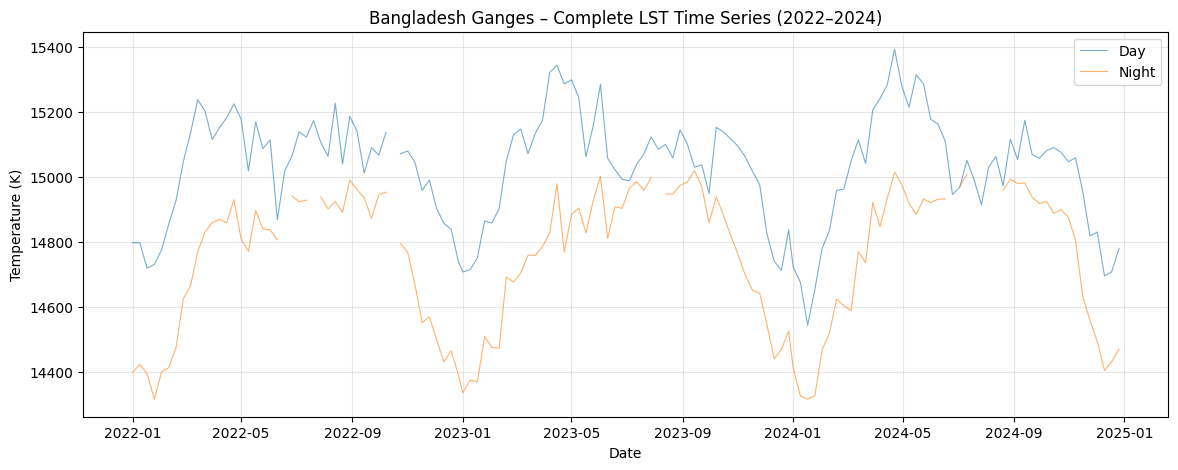

In [55]:
plt.figure(figsize=(14, 5))

plt.plot(
    pd.to_datetime(df_bangladesh_all_years['date']),
    df_bangladesh_all_years['LST_Day_1km_mean'],
    alpha=0.6,
    linewidth=0.8,
    label='Day'
)

plt.plot(
    pd.to_datetime(df_bangladesh_all_years['date']),
    df_bangladesh_all_years['LST_Night_1km_mean'],
    alpha=0.6,
    linewidth=0.8,
    label='Night'
)

plt.title('Bangladesh Ganges – Complete LST Time Series (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Yearly Temperature Distribution (Day LST)**

/tmp/ipython-input-3432884086.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(yearly_data, labels=labels)


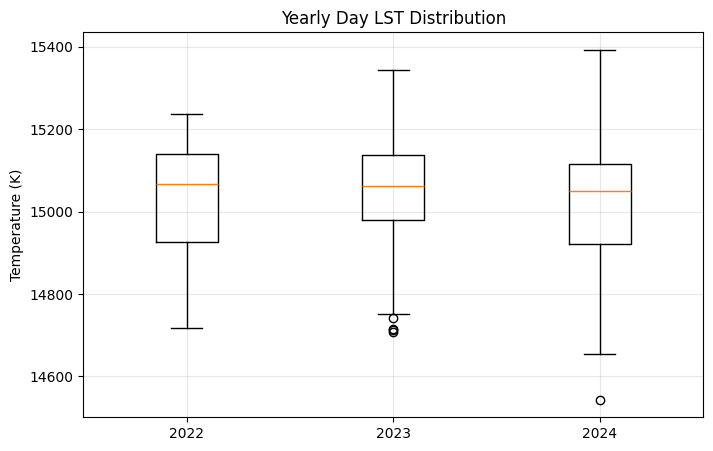

In [56]:
yearly_data = []
labels = []

for year in sorted(df_bangladesh_all_years['year'].unique()):
    yearly_data.append(
        df_bangladesh_all_years[
            df_bangladesh_all_years['year'] == year
        ]['LST_Day_1km_mean'].dropna()
    )
    labels.append(year)

plt.figure(figsize=(8, 5))
plt.boxplot(yearly_data, labels=labels)
plt.title('Yearly Day LST Distribution')
plt.ylabel('Temperature (K)')
plt.grid(alpha=0.3)
plt.show()


**Seasonal Pattern (Monthly Mean ± Std, All Years)**

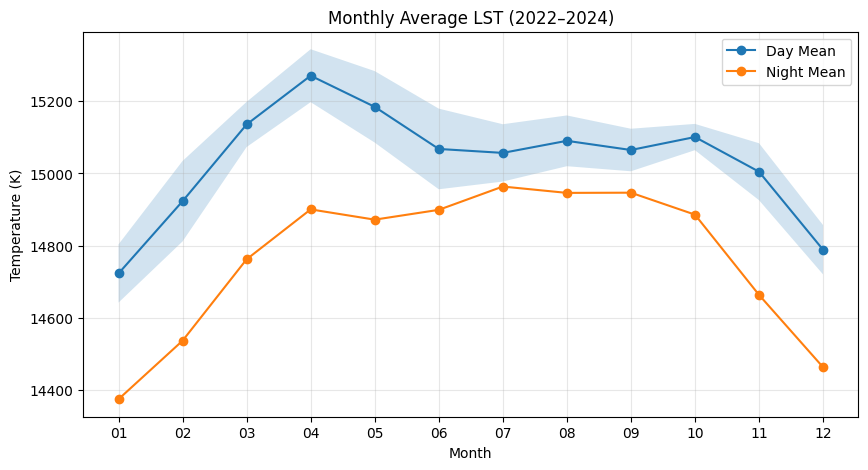

In [57]:
monthly_avg_all = df_bangladesh_all_years.groupby('month').agg({
    'LST_Day_1km_mean': ['mean', 'std'],
    'LST_Night_1km_mean': ['mean', 'std']
}).reset_index()

months = monthly_avg_all['month']
day_mean = monthly_avg_all[('LST_Day_1km_mean', 'mean')]
day_std = monthly_avg_all[('LST_Day_1km_mean', 'std')]
night_mean = monthly_avg_all[('LST_Night_1km_mean', 'mean')]

plt.figure(figsize=(10, 5))

plt.plot(months, day_mean, marker='o', label='Day Mean')
plt.fill_between(months, day_mean - day_std, day_mean + day_std, alpha=0.2)

plt.plot(months, night_mean, marker='o', label='Night Mean')

plt.title('Monthly Average LST (2022–2024)')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Correlation Matrix (Numerical Variables)**

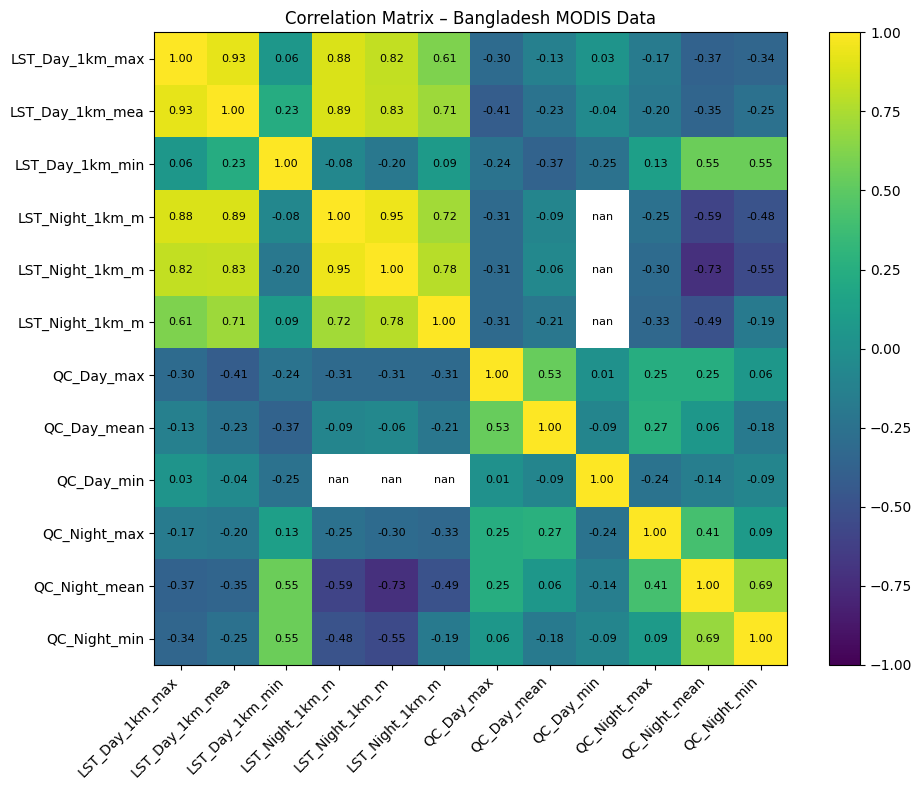

In [58]:
numerical_cols = df_bangladesh_all_years.select_dtypes(include=[np.number]).columns
corr_matrix = df_bangladesh_all_years[numerical_cols].corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, vmin=-1, vmax=1)

plt.title('Correlation Matrix – Bangladesh MODIS Data')
plt.xticks(range(len(numerical_cols)), [c[:15] for c in numerical_cols], rotation=45, ha='right')
plt.yticks(range(len(numerical_cols)), [c[:15] for c in numerical_cols])

for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', fontsize=8)

plt.colorbar(im)
plt.tight_layout()
plt.show()


##Sahel Mali

**2022**

In [59]:
# Sahel Mali 2022 Data
df_sahel_2022 = get_modis_year_data(
    region_name='Sahel_Mali',
    region_geom=regions['Sahel_Mali'],
    year=2022
)

df_sahel_2022 = explore_dataframe(df_sahel_2022, 'Sahel_Mali', 2022)


/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Sahel_Mali - Year 2022
Shape: (46, 17)
Date range: 2022-01-01 to 2022-12-27
Number of observations: 46

Missing values per column:
  LST_Day_1km_max: 1 missing
  LST_Day_1km_mean: 1 missing
  LST_Day_1km_min: 1 missing
  LST_Night_1km_max: 1 missing
  LST_Night_1km_mean: 1 missing
  LST_Night_1km_min: 1 missing
  QC_Day_max: 1 missing
  QC_Day_mean: 1 missing
  QC_Day_min: 1 missing
  QC_Night_max: 1 missing
  QC_Night_mean: 1 missing
  QC_Night_min: 1 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            45.00             45.00            45.00              45.00   
mean          16028.29          15430.92         14628.07           15116.33   
std             240.26            189.83           303.96             176.32   
min           15522.00          15138.60         13899.00           14741.00   
25%           15871.00          15294.75         14461.00           15001.00   
50%           16037.00  

**Day LST Time Series**

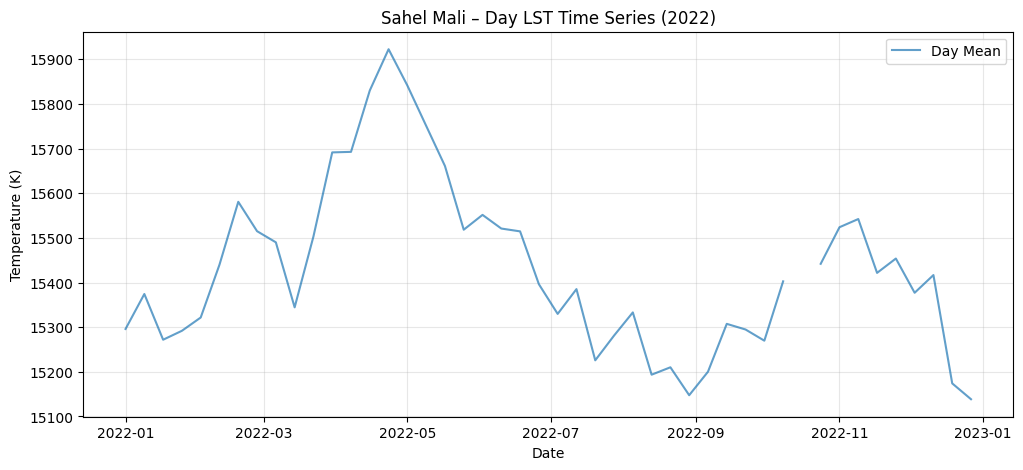

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

if not df_sahel_2022.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(
        pd.to_datetime(df_sahel_2022['date']),
        df_sahel_2022['LST_Day_1km_mean'],
        alpha=0.7,
        label='Day Mean'
    )

    plt.title('Sahel Mali – Day LST Time Series (2022)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No data available")


**Night LST Time Series**

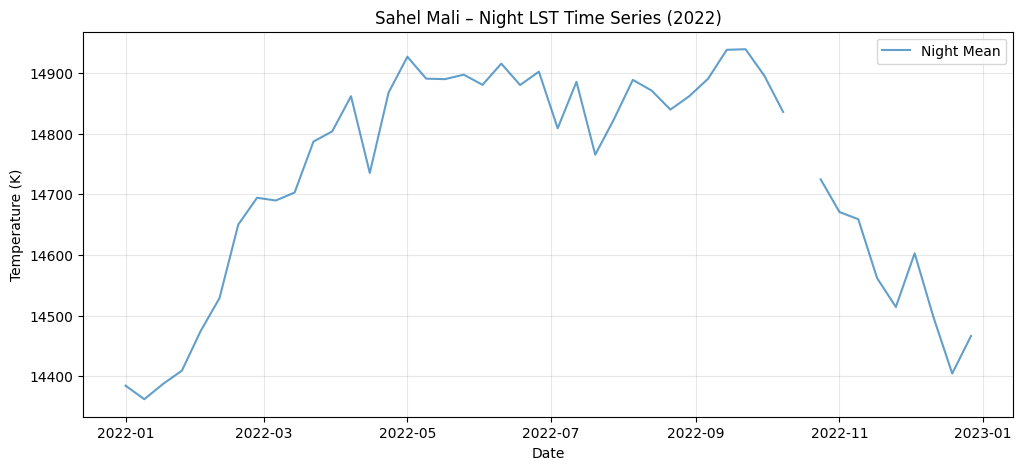

In [61]:
if not df_sahel_2022.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(
        pd.to_datetime(df_sahel_2022['date']),
        df_sahel_2022['LST_Night_1km_mean'],
        alpha=0.7,
        label='Night Mean'
    )

    plt.title('Sahel Mali – Night LST Time Series (2022)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No data available")


**Monthly Average Temperatures**

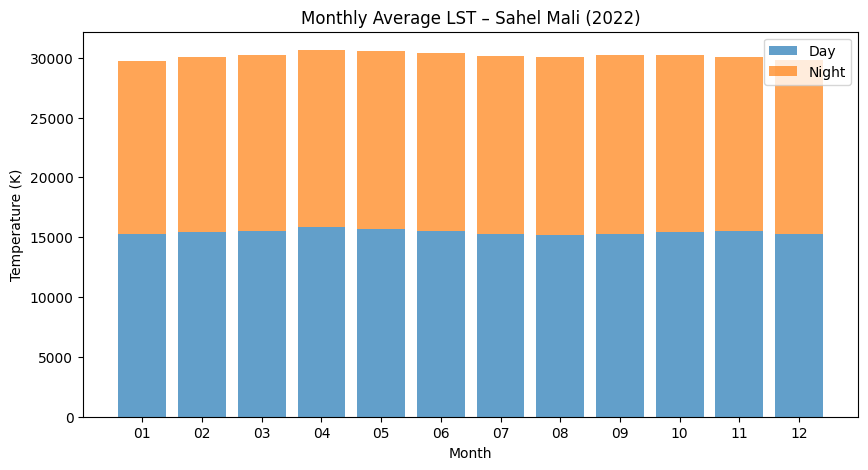

In [62]:
if not df_sahel_2022.empty:
    monthly_avg = df_sahel_2022.groupby('month').agg({
        'LST_Day_1km_mean': 'mean',
        'LST_Night_1km_mean': 'mean'
    }).reset_index()

    plt.figure(figsize=(10, 5))
    plt.bar(monthly_avg['month'], monthly_avg['LST_Day_1km_mean'],
            alpha=0.7, label='Day')
    plt.bar(
        monthly_avg['month'],
        monthly_avg['LST_Night_1km_mean'],
        alpha=0.7,
        label='Night',
        bottom=monthly_avg['LST_Day_1km_mean']
    )

    plt.title('Monthly Average LST – Sahel Mali (2022)')
    plt.xlabel('Month')
    plt.ylabel('Temperature (K)')
    plt.legend()
    plt.show()
else:
    print("No data available")


**Temperature Distribution (Day vs Night)**

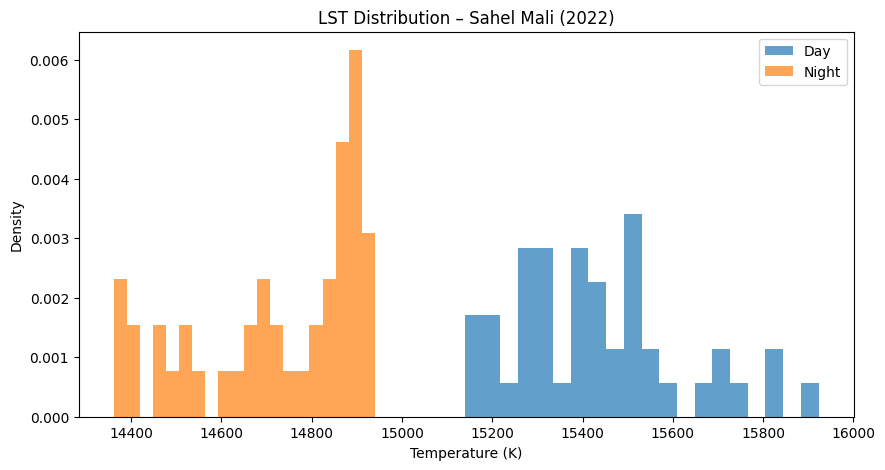

In [63]:
if not df_sahel_2022.empty:
    plt.figure(figsize=(10, 5))
    plt.hist(df_sahel_2022['LST_Day_1km_mean'], bins=20,
             alpha=0.7, label='Day', density=True)
    plt.hist(df_sahel_2022['LST_Night_1km_mean'], bins=20,
             alpha=0.7, label='Night', density=True)

    plt.title('LST Distribution – Sahel Mali (2022)')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("No data available")


In [65]:
if not df_sahel_2022.empty:
    df_sahel_2022.to_csv('sahel_mali_modis_2022.csv', index=False)
    print(" Data exported to: sahel_mali_modis_2022.csv")


 Data exported to: sahel_mali_modis_2022.csv


**2023**

**Day LST Time Series (2022 vs 2023)**

In [66]:
# Sahel Mali 2023 Data
df_sahel_2023 = get_modis_year_data(
    region_name='Sahel_Mali',
    region_geom=regions['Sahel_Mali'],
    year=2023
)

df_sahel_2023 = explore_dataframe(df_sahel_2023, 'Sahel_Mali', 2023)


/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Sahel_Mali - Year 2023
Shape: (46, 17)
Date range: 2023-01-01 to 2023-12-27
Number of observations: 46

Missing values per column:

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              46.00   
mean          16032.22          15473.50         14697.59           15139.43   
std             250.99            217.33           277.66             177.87   
min           15530.00          15112.05         13888.00           14766.00   
25%           15846.00          15310.03         14588.75           15027.25   
50%           16063.50          15442.63         14748.50           15149.00   
75%           16205.75          15612.22         14887.00           15282.75   
max           16617.00          15974.79         15055.00           15469.00   

       LST_Night_1km_mean  LST_Night_1km_min  QC_Day_max  QC_Day_mean  \
count               46.00              46.00

**Monthly Day LST Comparison**

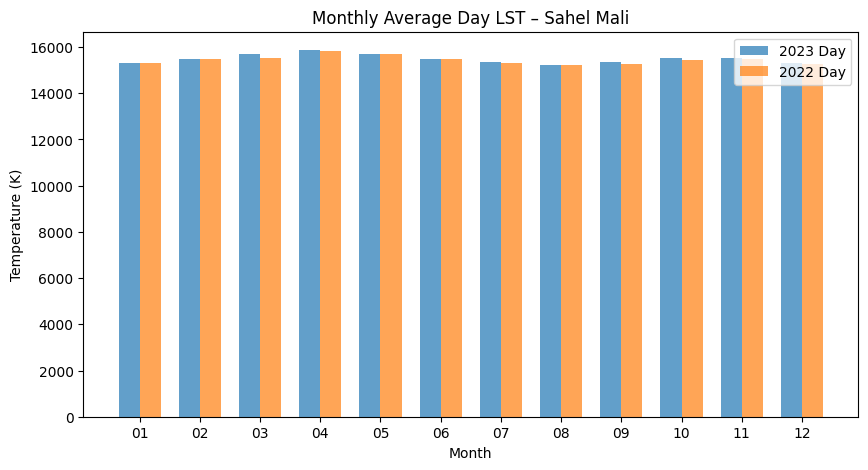

In [67]:
import numpy as np

if not df_sahel_2023.empty:
    monthly_2023 = df_sahel_2023.groupby('month').agg({
        'LST_Day_1km_mean': 'mean'
    }).reset_index()

    x = np.arange(len(monthly_2023))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, monthly_2023['LST_Day_1km_mean'],
            width, label='2023 Day', alpha=0.7)

    if not df_sahel_2022.empty:
        monthly_2022 = df_sahel_2022.groupby('month').agg({
            'LST_Day_1km_mean': 'mean'
        }).reset_index()

        plt.bar(x + width/2, monthly_2022['LST_Day_1km_mean'],
                width, label='2022 Day', alpha=0.7)

    plt.title('Monthly Average Day LST – Sahel Mali')
    plt.xlabel('Month')
    plt.ylabel('Temperature (K)')
    plt.xticks(x, monthly_2023['month'])
    plt.legend()
    plt.show()
else:
    print("No data available")


**Distribution Comparison (Boxplot)**

/tmp/ipython-input-138574204.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(temp_data, labels=labels)


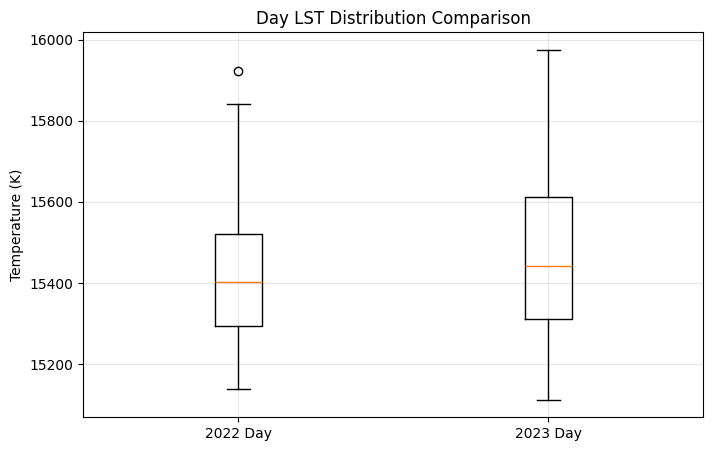

In [68]:
if not df_sahel_2023.empty:
    temp_data = []
    labels = []

    if not df_sahel_2022.empty:
        temp_data.append(df_sahel_2022['LST_Day_1km_mean'].dropna())
        labels.append('2022 Day')

    temp_data.append(df_sahel_2023['LST_Day_1km_mean'].dropna())
    labels.append('2023 Day')

    plt.figure(figsize=(8, 5))
    plt.boxplot(temp_data, labels=labels)
    plt.title('Day LST Distribution Comparison')
    plt.ylabel('Temperature (K)')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No data available")


**Summary Statistics (2022 vs 2023)**

In [70]:
print(" Yearly Day LST Statistics")

if not df_sahel_2022.empty:
    print(f"2022 Mean: {df_sahel_2022['LST_Day_1km_mean'].mean():.2f} K")

if not df_sahel_2023.empty:
    print(f"2023 Mean: {df_sahel_2023['LST_Day_1km_mean'].mean():.2f} K")


 Yearly Day LST Statistics
2022 Mean: 15430.92 K
2023 Mean: 15473.50 K


In [71]:
if not df_sahel_2023.empty:
    df_sahel_2023.to_csv('sahel_mali_modis_2023.csv', index=False)
    print(" Data exported to: sahel_mali_modis_2023.csv")


 Data exported to: sahel_mali_modis_2023.csv


**2024**

In [73]:
# Sahel Mali 2024 Data
df_sahel_2024 = get_modis_year_data(
    region_name='Sahel_Mali',
    region_geom=regions['Sahel_Mali'],
    year=2024
)
df_sahel_2024 = explore_dataframe(df_sahel_2024, 'Sahel_Mali', 2024)


/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Sahel_Mali - Year 2024
Shape: (46, 17)
Date range: 2024-01-01 to 2024-12-26
Number of observations: 46

Missing values per column:

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              46.00   
mean          15875.78          15355.46         14592.85           15145.09   
std             216.54            206.98           352.84             160.99   
min           15327.00          15000.33         13537.00           14737.00   
25%           15744.50          15195.56         14452.25           15061.00   
50%           15890.00          15355.60         14720.00           15171.00   
75%           16025.25          15488.97         14835.00           15260.75   
max           16312.00          15783.67         15012.00           15424.00   

       LST_Night_1km_mean  LST_Night_1km_min  QC_Day_max  QC_Day_mean  \
count               46.00              46.00

In [74]:
all_years_sahel = []

if not df_sahel_2022.empty:
    df_sahel_2022 = df_sahel_2022.copy()
    df_sahel_2022['year'] = '2022'
    all_years_sahel.append(df_sahel_2022)

if not df_sahel_2023.empty:
    df_sahel_2023 = df_sahel_2023.copy()
    df_sahel_2023['year'] = '2023'
    all_years_sahel.append(df_sahel_2023)

if not df_sahel_2024.empty:
    df_sahel_2024 = df_sahel_2024.copy()
    df_sahel_2024['year'] = '2024'
    all_years_sahel.append(df_sahel_2024)

df_all_years_sahel = pd.concat(all_years_sahel, ignore_index=True)


**Yearly Average Temperature Trend**

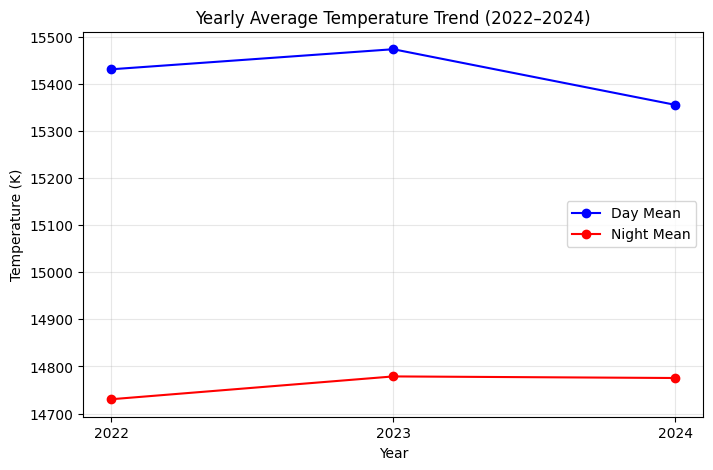

In [75]:
yearly_avg = df_all_years_sahel.groupby('year').agg({
    'LST_Day_1km_mean': 'mean',
    'LST_Night_1km_mean': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))
plt.plot(yearly_avg['year'], yearly_avg['LST_Day_1km_mean'], 'bo-', label='Day Mean')
plt.plot(yearly_avg['year'], yearly_avg['LST_Night_1km_mean'], 'ro-', label='Night Mean')
plt.title('Yearly Average Temperature Trend (2022–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**2024 Day LST Time Series + Trend Line**

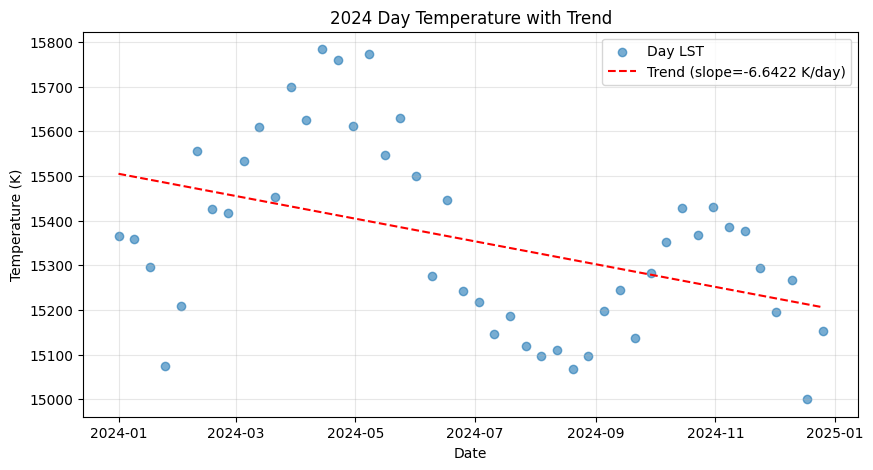

In [76]:
dates_2024 = pd.to_datetime(df_sahel_2024['date'])
x_numeric = np.arange(len(df_sahel_2024))

z = np.polyfit(x_numeric, df_sahel_2024['LST_Day_1km_mean'].dropna(), 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 5))
plt.scatter(dates_2024, df_sahel_2024['LST_Day_1km_mean'], alpha=0.6, label='Day LST')
plt.plot(dates_2024, p(x_numeric), 'r--',
         label=f'Trend (slope={z[0]:.4f} K/day)')
plt.title('2024 Day Temperature with Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Monthly Seasonal Patterns (All Years)**

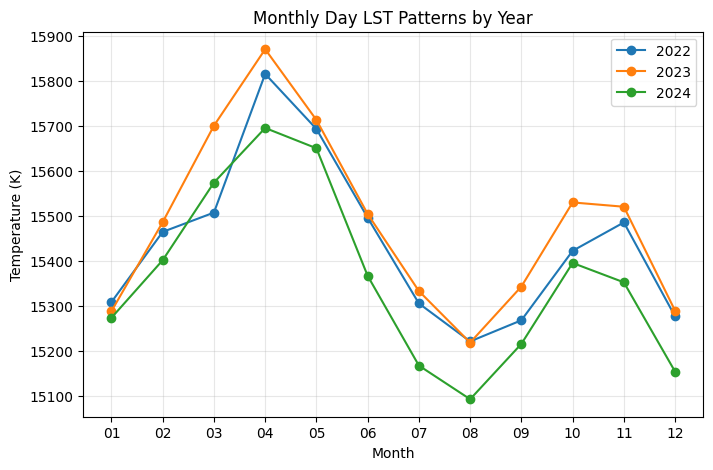

In [77]:
monthly_all_years = df_all_years_sahel.groupby(['year', 'month']).agg({
    'LST_Day_1km_mean': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))
for year in monthly_all_years['year'].unique():
    year_data = monthly_all_years[monthly_all_years['year'] == year]
    plt.plot(year_data['month'], year_data['LST_Day_1km_mean'], 'o-', label=year)

plt.title('Monthly Day LST Patterns by Year')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Day vs Night Temperature Density (2024)**

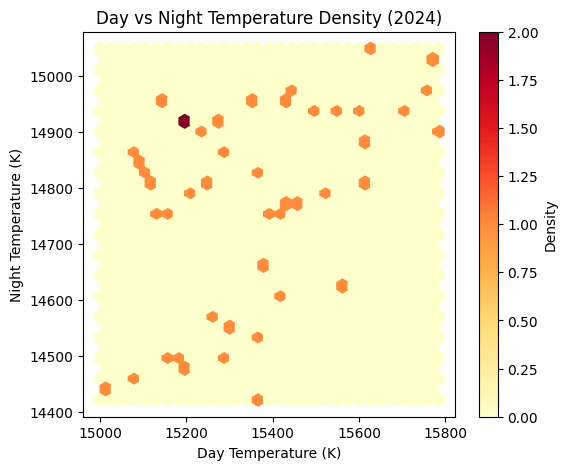

In [78]:
plt.figure(figsize=(6, 5))
hb = plt.hexbin(
    df_sahel_2024['LST_Day_1km_mean'],
    df_sahel_2024['LST_Night_1km_mean'],
    gridsize=30,
    cmap='YlOrRd'
)
plt.colorbar(hb, label='Density')
plt.xlabel('Day Temperature (K)')
plt.ylabel('Night Temperature (K)')
plt.title('Day vs Night Temperature Density (2024)')
plt.show()


**Summary Statistics**

In [81]:
print("2024 Summary Statistics")
print(f"Day Mean: {df_sahel_2024['LST_Day_1km_mean'].mean():.2f} K")
print(f"Night Mean: {df_sahel_2024['LST_Night_1km_mean'].mean():.2f} K")
print(f"Max Day: {df_sahel_2024['LST_Day_1km_mean'].max():.2f} K")
print(f"Min Night: {df_sahel_2024['LST_Night_1km_mean'].min():.2f} K")
print(f"Avg Day–Night Difference: {df_sahel_2024['temp_diff'].mean():.2f} K")


2024 Summary Statistics
Day Mean: 15355.46 K
Night Mean: 14775.45 K
Max Day: 15783.67 K
Min Night: 14422.31 K
Avg Day–Night Difference: 580.00 K


In [82]:
df_sahel_2024.to_csv('sahel_mali_modis_2024.csv', index=False)
print("Data exported to sahel_mali_modis_2024.csv")


Data exported to sahel_mali_modis_2024.csv


**Combine All Years**

In [83]:
# Combine all Sahel Mali years into one DataFrame
df_sahel_all_years = pd.concat([
    df_sahel_2022,
    df_sahel_2023,
    df_sahel_2024
], ignore_index=True)

# Convert date to datetime and sort
df_sahel_all_years['date_dt'] = pd.to_datetime(df_sahel_all_years['date'])
df_sahel_all_years = df_sahel_all_years.sort_values('date_dt')

# Info
print(f"\n{'='*60}")
print(f"FINAL COMBINED DATASET: SAHEL MALI")
print(f"{'='*60}")
print(f"Total records: {len(df_sahel_all_years):,}")
print(f"Date range: {df_sahel_all_years['date'].min()} to {df_sahel_all_years['date'].max()}")
print(f"Years covered: {sorted(df_sahel_all_years['year'].unique())}")
print(f"Columns: {df_sahel_all_years.columns.tolist()}")



FINAL COMBINED DATASET: SAHEL MALI
Total records: 138
Date range: 2022-01-01 to 2024-12-26
Years covered: ['2022', '2023', '2024']
Columns: ['LST_Day_1km_max', 'LST_Day_1km_mean', 'LST_Day_1km_min', 'LST_Night_1km_max', 'LST_Night_1km_mean', 'LST_Night_1km_min', 'QC_Day_max', 'QC_Day_mean', 'QC_Day_min', 'QC_Night_max', 'QC_Night_mean', 'QC_Night_min', 'date', 'region', 'satellite', 'year', 'month', 'temp_diff', 'date_dt']


**Export Combined CSV**

In [84]:
df_sahel_all_years.to_csv('sahel_mali_modis_all_years.csv', index=False)
print("\n Combined data exported to: sahel_mali_modis_all_years.csv")



 Combined data exported to: sahel_mali_modis_all_years.csv


**Complete Time Series**

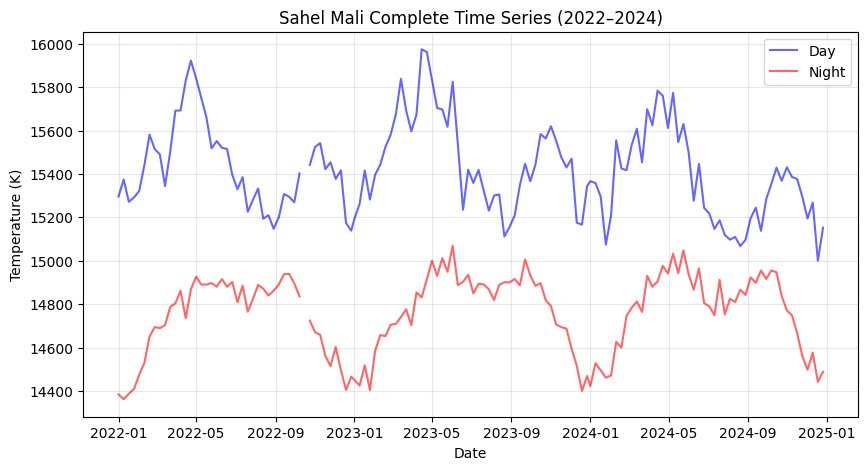

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(df_sahel_all_years['date_dt'], df_sahel_all_years['LST_Day_1km_mean'], 'b-', alpha=0.6, label='Day')
plt.plot(df_sahel_all_years['date_dt'], df_sahel_all_years['LST_Night_1km_mean'], 'r-', alpha=0.6, label='Night')
plt.title('Sahel Mali Complete Time Series (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Yearly Boxplots**

/tmp/ipython-input-1518515608.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(yearly_data, labels=labels)


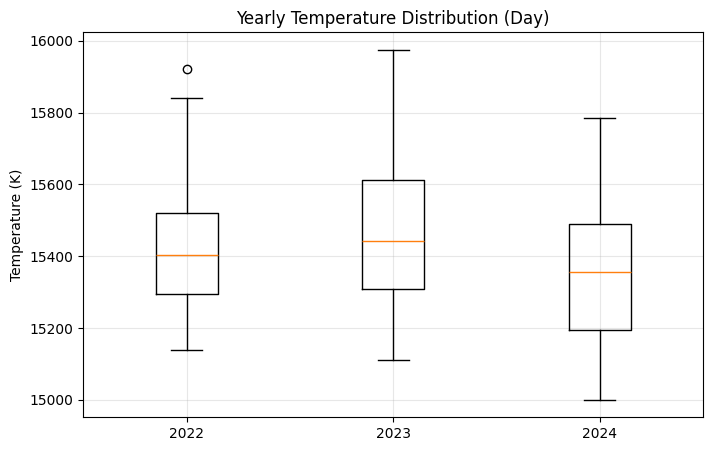

In [86]:
yearly_data = []
labels = []

for year in sorted(df_sahel_all_years['year'].unique()):
    year_data = df_sahel_all_years[df_sahel_all_years['year'] == year]
    yearly_data.append(year_data['LST_Day_1km_mean'].dropna())
    labels.append(year)

plt.figure(figsize=(8, 5))
plt.boxplot(yearly_data, labels=labels)
plt.title('Yearly Temperature Distribution (Day)')
plt.ylabel('Temperature (K)')
plt.grid(alpha=0.3)
plt.show()


**Monthly Averages & Standard Deviation**

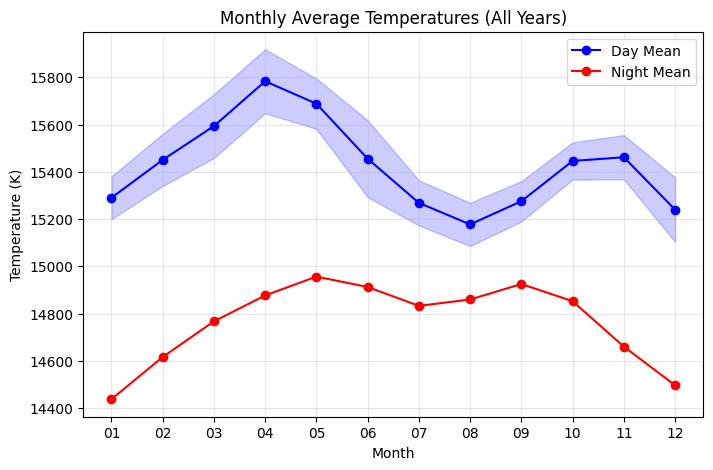

In [87]:
monthly_avg_all = df_sahel_all_years.groupby('month').agg({
    'LST_Day_1km_mean': ['mean', 'std'],
    'LST_Night_1km_mean': ['mean', 'std']
}).reset_index()

months = monthly_avg_all['month']
day_mean = monthly_avg_all[('LST_Day_1km_mean', 'mean')]
day_std = monthly_avg_all[('LST_Day_1km_mean', 'std')]
night_mean = monthly_avg_all[('LST_Night_1km_mean', 'mean')]

plt.figure(figsize=(8, 5))
plt.plot(months, day_mean, 'bo-', label='Day Mean')
plt.fill_between(months, day_mean - day_std, day_mean + day_std, alpha=0.2, color='blue')
plt.plot(months, night_mean, 'ro-', label='Night Mean')
plt.title('Monthly Average Temperatures (All Years)')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Correlation Heatmap**

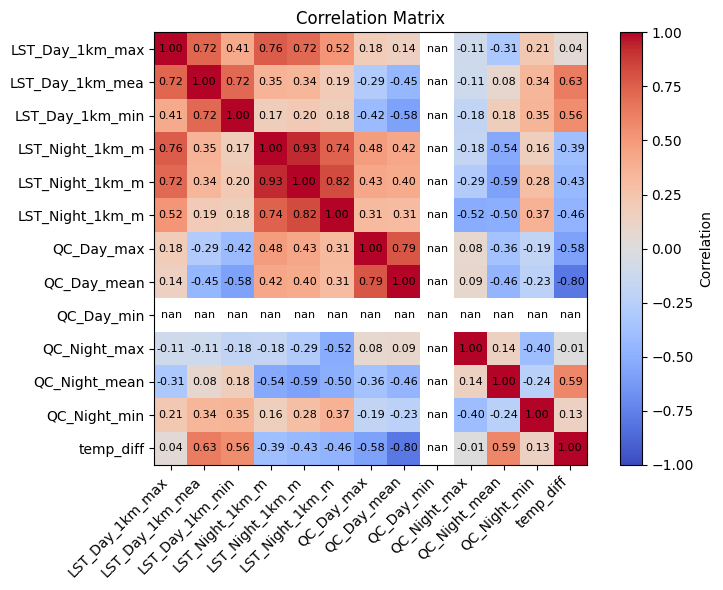

In [88]:
numerical_cols = df_sahel_all_years.select_dtypes(include=[np.number]).columns
corr_matrix = df_sahel_all_years[numerical_cols].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(range(len(numerical_cols)), [col[:15] for col in numerical_cols], rotation=45, ha='right')
plt.yticks(range(len(numerical_cols)), [col[:15] for col in numerical_cols])

# Add values
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.colorbar(im, label='Correlation')
plt.tight_layout()
plt.show()


## Amazon Peru

**2022**

In [89]:
# Amazon Peru 2022 Data
df_amazon_2022 = get_modis_year_data(
    region_name='Amazon_Peru',
    region_geom=regions['Amazon_Peru'],
    year=2022
)

# Explore the data
df_amazon_2022 = explore_dataframe(df_amazon_2022, 'Amazon_Peru', 2022)


/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Amazon_Peru - Year 2022
Shape: (46, 17)
Date range: 2022-01-01 to 2022-12-27
Number of observations: 46

Missing values per column:
  LST_Day_1km_max: 1 missing
  LST_Day_1km_mean: 1 missing
  LST_Day_1km_min: 1 missing
  LST_Night_1km_max: 3 missing
  LST_Night_1km_mean: 3 missing
  LST_Night_1km_min: 3 missing
  QC_Day_max: 1 missing
  QC_Day_mean: 1 missing
  QC_Day_min: 1 missing
  QC_Night_max: 1 missing
  QC_Night_mean: 1 missing
  QC_Night_min: 1 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            45.00             45.00            45.00              43.00   
mean          15528.02          15033.53         14252.16           14968.74   
std             174.13             69.04           349.68             113.62   
min           15201.00          14869.77         13444.00           14732.00   
25%           15381.00          14991.13         14053.00           14877.50   
50%           15551.00 

**Visualize Time Series**

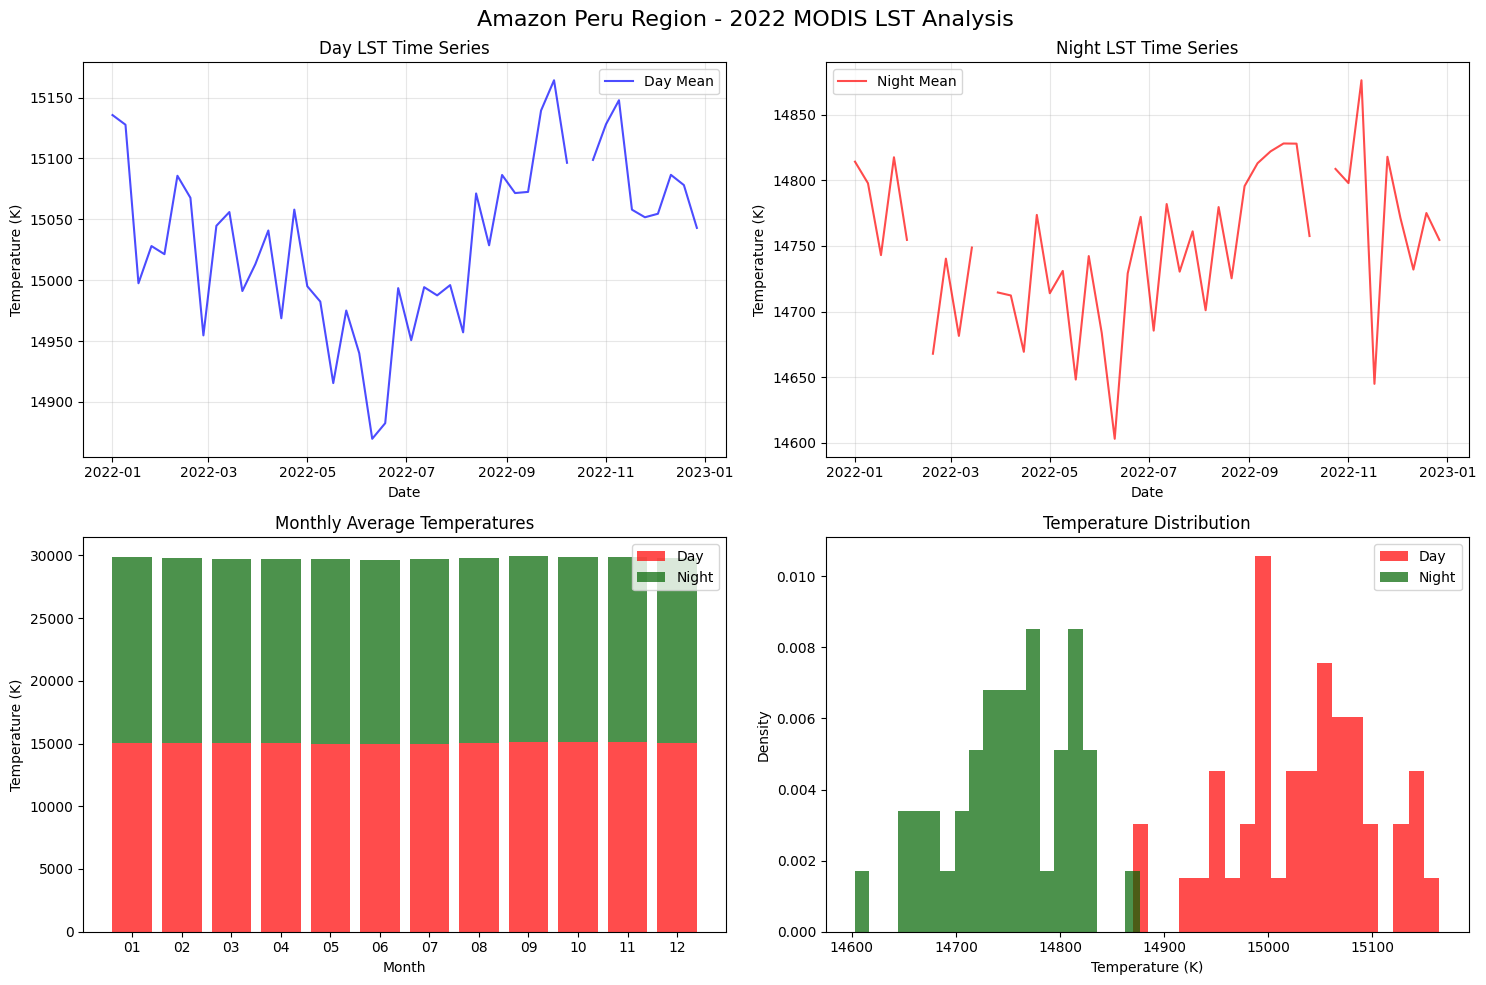

In [102]:
if not df_amazon_2022.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Amazon Peru Region - 2022 MODIS LST Analysis', fontsize=16)

    # Time series of day temperature
    axes[0, 0].plot(pd.to_datetime(df_amazon_2022['date']), df_amazon_2022['LST_Day_1km_mean'],
                   'b-', alpha=0.7, label='Day Mean')
    axes[0, 0].set_title('Day LST Time Series')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Temperature (K)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Time series of night temperature
    axes[0, 1].plot(pd.to_datetime(df_amazon_2022['date']), df_amazon_2022['LST_Night_1km_mean'],
                   'r-', alpha=0.7, label='Night Mean')
    axes[0, 1].set_title('Night LST Time Series')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Temperature (K)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Monthly averages
    monthly_avg = df_amazon_2022.groupby('month').agg({
        'LST_Day_1km_mean': 'mean',
        'LST_Night_1km_mean': 'mean'
    }).reset_index()

    axes[1, 0].bar(monthly_avg['month'], monthly_avg['LST_Day_1km_mean'],
                   alpha=0.7, label='Day', color='red')
    axes[1, 0].bar(monthly_avg['month'], monthly_avg['LST_Night_1km_mean'],
                   alpha=0.7, label='Night', color='darkgreen',
                   bottom=monthly_avg['LST_Day_1km_mean'])
    axes[1, 0].set_title('Monthly Average Temperatures')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Temperature (K)')
    axes[1, 0].legend()

    # Temperature distribution
    axes[1, 1].hist(df_amazon_2022['LST_Day_1km_mean'], bins=20, alpha=0.7,
                   label='Day', density=True, color='red')
    axes[1, 1].hist(df_amazon_2022['LST_Night_1km_mean'], bins=20, alpha=0.7,
                   label='Night', density=True, color='darkgreen')
    axes[1, 1].set_title('Temperature Distribution')
    axes[1, 1].set_xlabel('Temperature (K)')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()


else:
    print("No data available for visualization")


In [101]:
    # Export to CSV
    df_amazon_2022.to_csv('amazon_peru_modis_2022.csv', index=False)
    print(f"\n Data exported to: amazon_peru_modis_2022.csv")


 Data exported to: amazon_peru_modis_2022.csv


**2023**

In [103]:
# Amazon Peru 2023 Data
df_amazon_2023 = get_modis_year_data(
    region_name='Amazon_Peru',
    region_geom=regions['Amazon_Peru'],
    year=2023
)

# Explore the data
df_amazon_2023 = explore_dataframe(df_amazon_2023, 'Amazon_Peru', 2023)


/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Amazon_Peru - Year 2023
Shape: (46, 17)
Date range: 2023-01-01 to 2023-12-27
Number of observations: 46

Missing values per column:
  LST_Night_1km_max: 1 missing
  LST_Night_1km_mean: 1 missing
  LST_Night_1km_min: 1 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              45.00   
mean          15527.00          15041.13         14274.28           14974.60   
std             153.78             70.22           366.93             133.04   
min           15202.00          14901.37         13440.00           14671.00   
25%           15432.25          14991.18         14041.00           14907.00   
50%           15482.00          15036.08         14220.00           14961.00   
75%           15626.25          15086.99         14587.50           15037.00   
max           15865.00          15176.67         14936.00           15417.00   

       LST_Night_1km_m

**Box Plot Comparison**

/tmp/ipython-input-4018365271.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axes.plot(pd.to_datetime(df_amazon_2023['date']), df_amazon_2023['LST_Day_1km_mean'],
/tmp/ipython-input-4018365271.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  axes.plot(pd.to_datetime(df_amazon_2022['date']), df_amazon_2022['LST_Day_1km_mean'],


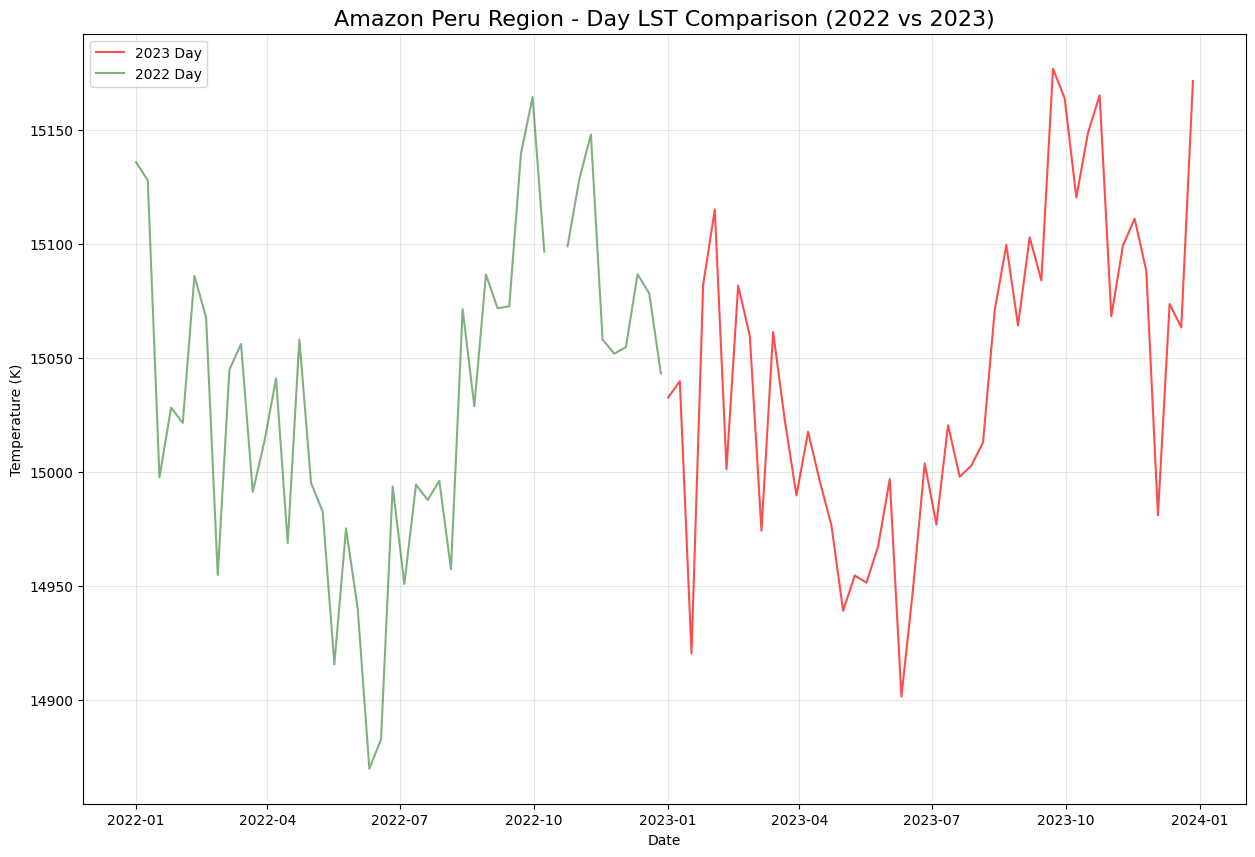

In [109]:
if not df_amazon_2023.empty:
    fig, axes = plt.subplots(1, 1, figsize=(15, 10))

    # Time series comparison
    axes.plot(pd.to_datetime(df_amazon_2023['date']), df_amazon_2023['LST_Day_1km_mean'],
                   'b-', alpha=0.7, label='2023 Day', color='red')
    if not df_amazon_2022.empty:
        axes.plot(pd.to_datetime(df_amazon_2022['date']), df_amazon_2022['LST_Day_1km_mean'],
                       'g-', alpha=0.5, label='2022 Day', color='darkgreen')
    axes.set_title('Amazon Peru Region - Day LST Comparison (2022 vs 2023)', fontsize=16)
    axes.set_xlabel('Date')
    axes.set_ylabel('Temperature (K)')
    axes.legend()
    axes.grid(True, alpha=0.3)
    plt.show()
else:
    print("No data available for visualization")

**Yearly Statistics and Export**

In [110]:
    # Calculate statistics
    print(f"\n Yearly Statistics:")
    if not df_amazon_2022.empty:
        print(f"2022 Day Mean: {df_amazon_2022['LST_Day_1km_mean'].mean():.2f}K")
    print(f"2023 Day Mean: {df_amazon_2023['LST_Day_1km_mean'].mean():.2f}K")

    # Export to CSV
    df_amazon_2023.to_csv('amazon_peru_modis_2023.csv', index=False)
    print(f"\n Data exported to: amazon_peru_modis_2023.csv")



 Yearly Statistics:
2022 Day Mean: 15033.53K
2023 Day Mean: 15041.13K

 Data exported to: amazon_peru_modis_2023.csv


**2024**

In [115]:
# Amazon Peru 2024 Data
df_amazon_2024 = get_modis_year_data(
    region_name='Amazon_Peru',
    region_geom=regions['Amazon_Peru'],
    year=2024
)

# Explore the data
df_amazon_2024 = explore_dataframe(df_amazon_2024, 'Amazon_Peru', 2024)

/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Amazon_Peru - Year 2024
Shape: (46, 17)
Date range: 2024-01-01 to 2024-12-26
Number of observations: 46

Missing values per column:
  LST_Night_1km_max: 4 missing
  LST_Night_1km_mean: 4 missing
  LST_Night_1km_min: 4 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              42.00   
mean          15474.57          15029.94         14344.37           14991.31   
std             164.15             78.41           345.22              99.59   
min           15096.00          14851.91         13558.00           14809.00   
25%           15373.00          14982.09         14140.00           14923.00   
50%           15483.00          15041.28         14357.50           14974.00   
75%           15571.50          15092.54         14539.75           15044.00   
max           15868.00          15175.08         14978.00           15274.00   

       LST_Night_1km_m

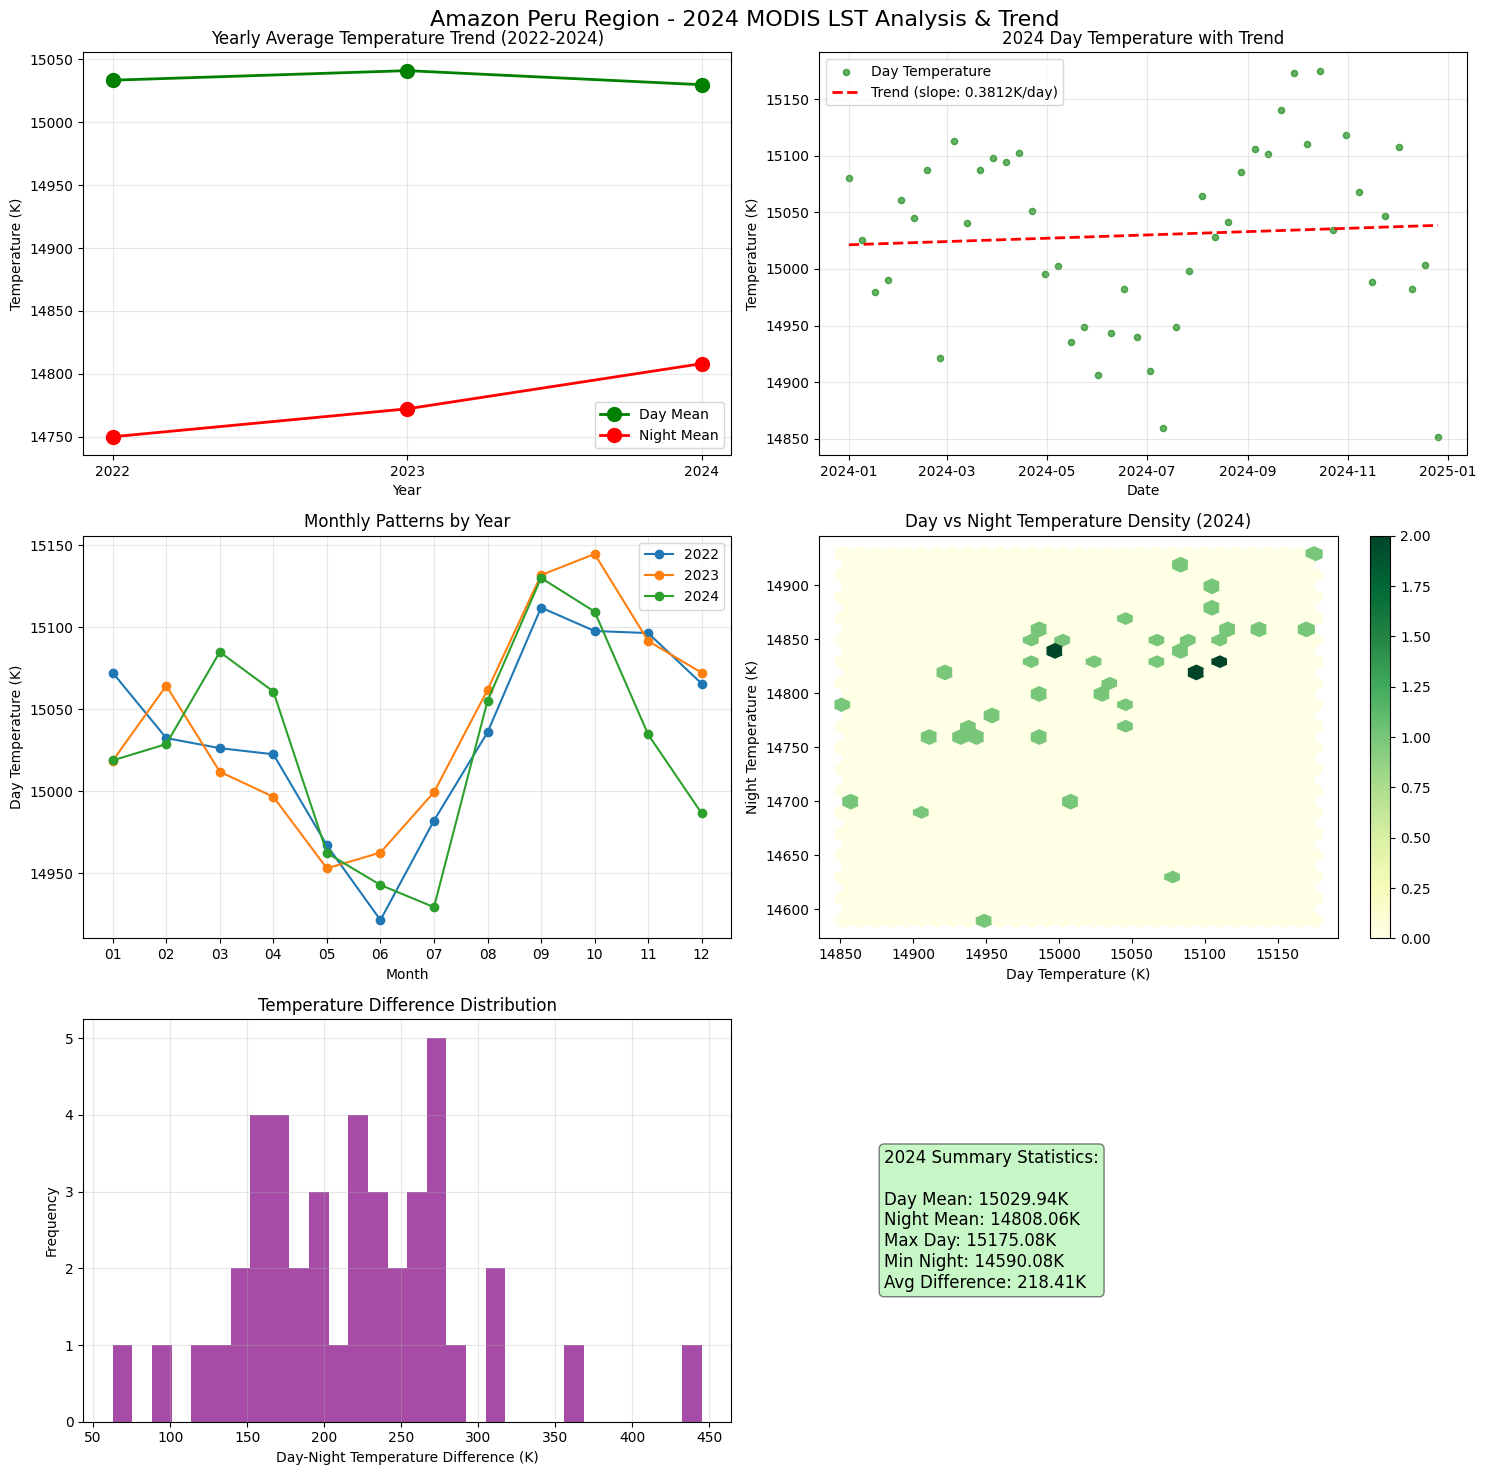

In [116]:
# Visualize Amazon Peru 2024
if not df_amazon_2024.empty:
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Amazon Peru Region - 2024 MODIS LST Analysis & Trend', fontsize=16)

    # Collect all years for trend analysis
    all_years_amazon = []
    if not df_amazon_2022.empty:
        df_amazon_2022['year'] = '2022'
        all_years_amazon.append(df_amazon_2022)
    if not df_amazon_2023.empty:
        df_amazon_2023['year'] = '2023'
        all_years_amazon.append(df_amazon_2023)
    if not df_amazon_2024.empty:
        df_amazon_2024['year'] = '2024'
        all_years_amazon.append(df_amazon_2024)

    if all_years_amazon:
        df_all_years_amazon = pd.concat(all_years_amazon, ignore_index=True)

        # Yearly averages trend
        yearly_avg = df_all_years_amazon.groupby('year').agg({
            'LST_Day_1km_mean': 'mean',
            'LST_Night_1km_mean': 'mean'
        }).reset_index()

        axes[0, 0].plot(yearly_avg['year'], yearly_avg['LST_Day_1km_mean'],
                       'go-', markersize=10, linewidth=2, label='Day Mean')
        axes[0, 0].plot(yearly_avg['year'], yearly_avg['LST_Night_1km_mean'],
                       'ro-', markersize=10, linewidth=2, label='Night Mean')
        axes[0, 0].set_title('Yearly Average Temperature Trend (2022-2024)')
        axes[0, 0].set_xlabel('Year')
        axes[0, 0].set_ylabel('Temperature (K)')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

    # 2024 time series with trend line
    dates_2024 = pd.to_datetime(df_amazon_2024['date'])
    axes[0, 1].scatter(dates_2024, df_amazon_2024['LST_Day_1km_mean'],
                      alpha=0.6, s=20, label='Day Temperature', color='green')

    # Add trend line
    x_numeric = np.arange(len(df_amazon_2024))
    z = np.polyfit(x_numeric, df_amazon_2024['LST_Day_1km_mean'].dropna(), 1)
    p = np.poly1d(z)
    axes[0, 1].plot(dates_2024, p(x_numeric), "r--", linewidth=2,
                   label=f'Trend (slope: {z[0]:.4f}K/day)')

    axes[0, 1].set_title('2024 Day Temperature with Trend')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Temperature (K)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Seasonal pattern (monthly averages for all available years)
    if 'df_all_years_amazon' in locals():
        monthly_all_years = df_all_years_amazon.groupby(['year', 'month']).agg({
            'LST_Day_1km_mean': 'mean'
        }).reset_index()

        for year in monthly_all_years['year'].unique():
            year_data = monthly_all_years[monthly_all_years['year'] == year]
            axes[1, 0].plot(year_data['month'], year_data['LST_Day_1km_mean'],
                          'o-', label=f'{year}')

        axes[1, 0].set_title('Monthly Patterns by Year')
        axes[1, 0].set_xlabel('Month')
        axes[1, 0].set_ylabel('Day Temperature (K)')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # Heatmap of day vs night temperature
    heatmap_data = df_amazon_2024[['LST_Day_1km_mean', 'LST_Night_1km_mean']].dropna()
    axes[1, 1].hexbin(heatmap_data['LST_Day_1km_mean'],
                     heatmap_data['LST_Night_1km_mean'],
                     gridsize=30, cmap='YlGn')
    axes[1, 1].set_xlabel('Day Temperature (K)')
    axes[1, 1].set_ylabel('Night Temperature (K)')
    axes[1, 1].set_title('Day vs Night Temperature Density (2024)')
    plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])

    # Temperature difference analysis
    df_amazon_2024['temp_diff'] = df_amazon_2024['LST_Day_1km_mean'] - df_amazon_2024['LST_Night_1km_mean']
    axes[2, 0].hist(df_amazon_2024['temp_diff'].dropna(), bins=30, alpha=0.7, color='purple')
    axes[2, 0].set_xlabel('Day-Night Temperature Difference (K)')
    axes[2, 0].set_ylabel('Frequency')
    axes[2, 0].set_title('Temperature Difference Distribution')
    axes[2, 0].grid(True, alpha=0.3)

    # Summary statistics table
    stats_text = "2024 Summary Statistics:\n\n"
    stats_text += f"Day Mean: {df_amazon_2024['LST_Day_1km_mean'].mean():.2f}K\n"
    stats_text += f"Night Mean: {df_amazon_2024['LST_Night_1km_mean'].mean():.2f}K\n"
    stats_text += f"Max Day: {df_amazon_2024['LST_Day_1km_mean'].max():.2f}K\n"
    stats_text += f"Min Night: {df_amazon_2024['LST_Night_1km_mean'].min():.2f}K\n"
    stats_text += f"Avg Difference: {df_amazon_2024['temp_diff'].mean():.2f}K"

    axes[2, 1].text(0.1, 0.5, stats_text, fontsize=12,
                   verticalalignment='center',
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    axes[2, 1].axis('off')

    plt.tight_layout()
    plt.show()

**Combine all years**

In [118]:
# Combine all Amazon Peru years into one DataFrame
df_amazon_all_years = pd.concat([
    df_amazon_2022,
    df_amazon_2023,
    df_amazon_2024
], ignore_index=True)

# Sort by date
df_amazon_all_years['date_dt'] = pd.to_datetime(df_amazon_all_years['date'])
df_amazon_all_years = df_amazon_all_years.sort_values('date_dt')

print(f"\n{'='*60}")
print(f"FINAL COMBINED DATASET: AMAZON PERU")
print(f"{'='*60}")
print(f"Total records: {len(df_amazon_all_years):,}")
print(f"Date range: {df_amazon_all_years['date'].min()} to {df_amazon_all_years['date'].max()}")
print(f"Years covered: {sorted(df_amazon_all_years['year'].unique())}")
print(f"Columns: {df_amazon_all_years.columns.tolist()}")

# Save the combined dataset
df_amazon_all_years.to_csv('amazon_peru_modis_all_years.csv', index=False)
print(f"\n Combined data exported to: amazon_peru_modis_all_years.csv")

print(f"\n Amazon Peru analysis complete! Key files created:")
print("   - amazon_peru_modis_2022.csv")
print("   - amazon_peru_modis_2023.csv")
print("   - amazon_peru_modis_2024.csv")
print("   - amazon_peru_modis_all_years.csv")


FINAL COMBINED DATASET: AMAZON PERU
Total records: 138
Date range: 2022-01-01 to 2024-12-26
Years covered: ['2022', '2023', '2024']
Columns: ['LST_Day_1km_max', 'LST_Day_1km_mean', 'LST_Day_1km_min', 'LST_Night_1km_max', 'LST_Night_1km_mean', 'LST_Night_1km_min', 'QC_Day_max', 'QC_Day_mean', 'QC_Day_min', 'QC_Night_max', 'QC_Night_mean', 'QC_Night_min', 'date', 'region', 'satellite', 'year', 'month', 'temp_diff', 'date_dt']

 Combined data exported to: amazon_peru_modis_all_years.csv

 Amazon Peru analysis complete! Key files created:
   - amazon_peru_modis_2022.csv
   - amazon_peru_modis_2023.csv
   - amazon_peru_modis_2024.csv
   - amazon_peru_modis_all_years.csv


/tmp/ipython-input-217387581.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(yearly_data, labels=labels)


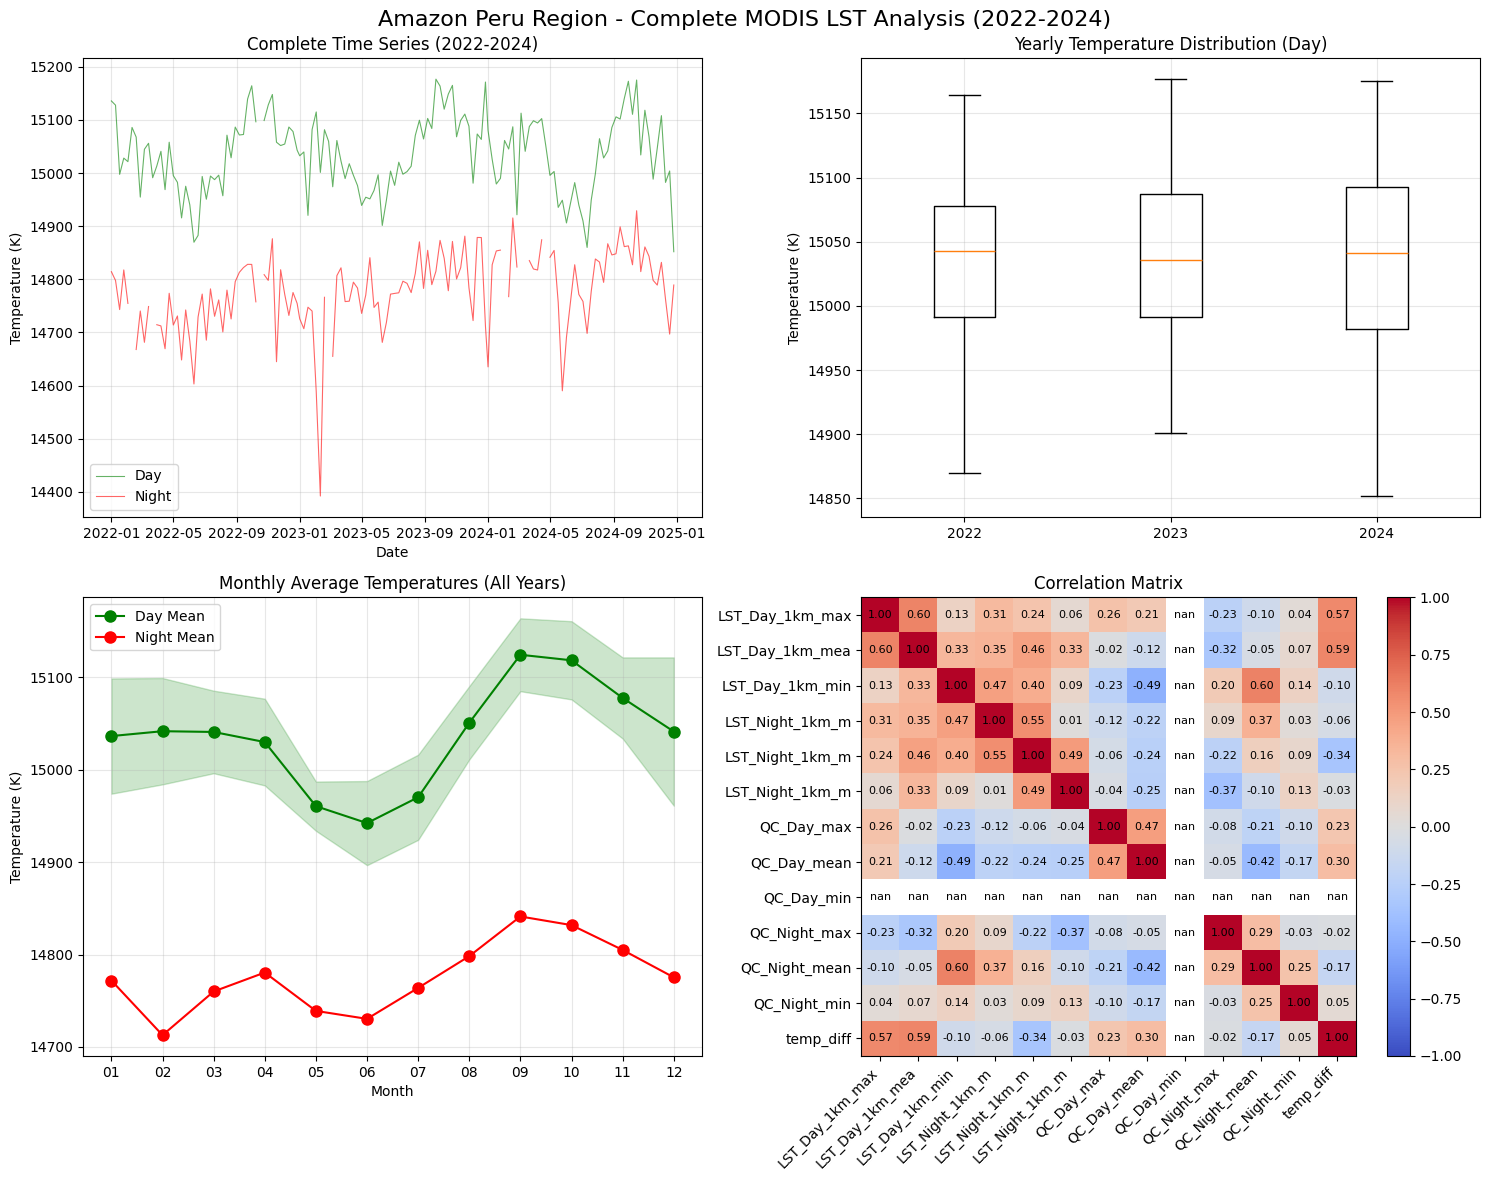

In [119]:

# Create final visualization for Amazon Peru
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Amazon Peru Region - Complete MODIS LST Analysis (2022-2024)', fontsize=16)

# 1. Complete time series
axes[0, 0].plot(pd.to_datetime(df_amazon_all_years['date']),
                df_amazon_all_years['LST_Day_1km_mean'],
                'g-', alpha=0.6, linewidth=0.8, label='Day')
axes[0, 0].plot(pd.to_datetime(df_amazon_all_years['date']),
                df_amazon_all_years['LST_Night_1km_mean'],
                'r-', alpha=0.6, linewidth=0.8, label='Night')
axes[0, 0].set_title('Complete Time Series (2022-2024)')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Temperature (K)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Yearly box plots
yearly_data = []
labels = []
for year in sorted(df_amazon_all_years['year'].unique()):
    year_data = df_amazon_all_years[df_amazon_all_years['year'] == year]
    yearly_data.append(year_data['LST_Day_1km_mean'].dropna())
    labels.append(year)

axes[0, 1].boxplot(yearly_data, labels=labels)
axes[0, 1].set_title('Yearly Temperature Distribution (Day)')
axes[0, 1].set_ylabel('Temperature (K)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Seasonal patterns (monthly averages across all years)
monthly_avg_all = df_amazon_all_years.groupby('month').agg({
    'LST_Day_1km_mean': ['mean', 'std'],
    'LST_Night_1km_mean': ['mean', 'std']
}).reset_index()

months = monthly_avg_all['month']
day_mean = monthly_avg_all[('LST_Day_1km_mean', 'mean')]
day_std = monthly_avg_all[('LST_Day_1km_mean', 'std')]
night_mean = monthly_avg_all[('LST_Night_1km_mean', 'mean')]

axes[1, 0].plot(months, day_mean, 'go-', label='Day Mean', markersize=8)
axes[1, 0].fill_between(months, day_mean - day_std, day_mean + day_std,
                        alpha=0.2, color='green')
axes[1, 0].plot(months, night_mean, 'ro-', label='Night Mean', markersize=8)
axes[1, 0].set_title('Monthly Average Temperatures (All Years)')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Temperature (K)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Correlation heatmap (numerical columns only)
numerical_cols = df_amazon_all_years.select_dtypes(include=[np.number]).columns
corr_matrix = df_amazon_all_years[numerical_cols].corr()

im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 1].set_title('Correlation Matrix')
axes[1, 1].set_xticks(range(len(numerical_cols)))
axes[1, 1].set_yticks(range(len(numerical_cols)))
axes[1, 1].set_xticklabels([col[:15] for col in numerical_cols], rotation=45, ha='right')
axes[1, 1].set_yticklabels([col[:15] for col in numerical_cols])

# Add correlation values
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        text = axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=axes[1, 1])
plt.tight_layout()
plt.show()


## Beijing China

**2022**

In [120]:
# Beijing China 2022 Data
df_beijing_2022 = get_modis_year_data(
    region_name='Beijing_China',
    region_geom=regions['Beijing_China'],
    year=2022
)

# Explore the data
df_beijing_2022 = explore_dataframe(df_beijing_2022, 'Beijing_China', 2022)



/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Beijing_China - Year 2022
Shape: (46, 17)
Date range: 2022-01-01 to 2022-12-27
Number of observations: 46

Missing values per column:
  LST_Day_1km_max: 1 missing
  LST_Day_1km_mean: 1 missing
  LST_Day_1km_min: 1 missing
  LST_Night_1km_max: 1 missing
  LST_Night_1km_mean: 1 missing
  LST_Night_1km_min: 1 missing
  QC_Day_max: 1 missing
  QC_Day_mean: 1 missing
  QC_Day_min: 1 missing
  QC_Night_max: 1 missing
  QC_Night_mean: 1 missing
  QC_Night_min: 1 missing

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            45.00             45.00            45.00              45.00   
mean          14939.53          14613.81         14064.64           14394.62   
std             670.77            605.79           598.55             528.73   
min           13826.00          13541.34         13033.00           13630.00   
25%           14298.00          14016.96         13440.00           13883.00   
50%           15165.0

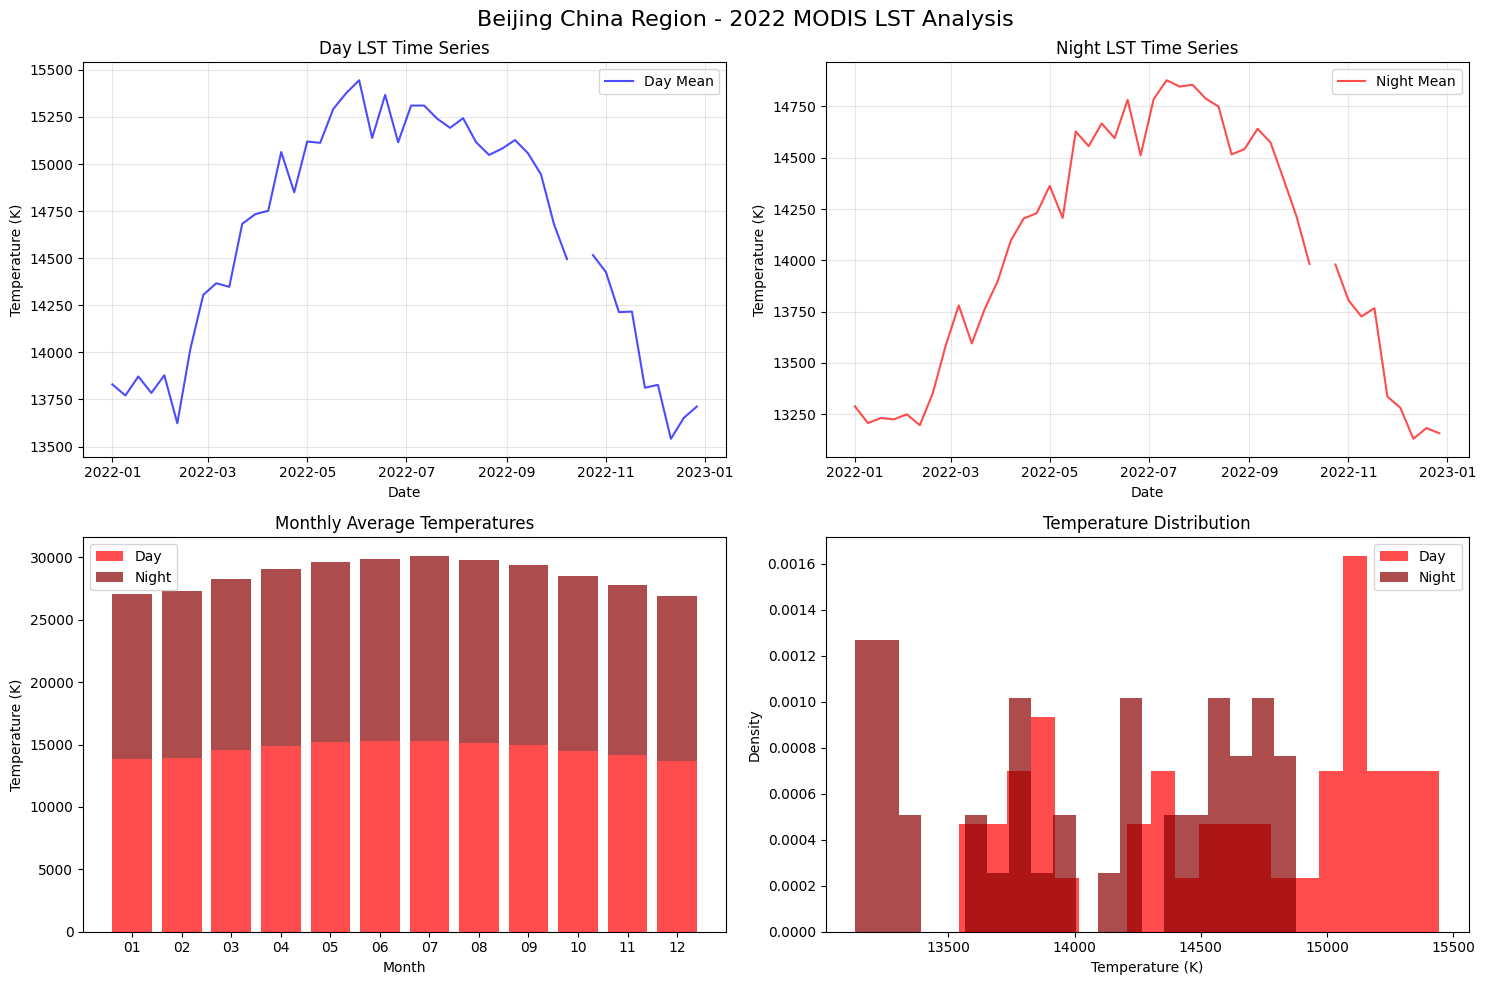

In [122]:
# Visualize Beijing China 2022
if not df_beijing_2022.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Beijing China Region - 2022 MODIS LST Analysis', fontsize=16)

    # Time series of day temperature
    axes[0, 0].plot(pd.to_datetime(df_beijing_2022['date']), df_beijing_2022['LST_Day_1km_mean'],
                   'b-', alpha=0.7, label='Day Mean')
    axes[0, 0].set_title('Day LST Time Series')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Temperature (K)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Time series of night temperature
    axes[0, 1].plot(pd.to_datetime(df_beijing_2022['date']), df_beijing_2022['LST_Night_1km_mean'],
                   'r-', alpha=0.7, label='Night Mean')
    axes[0, 1].set_title('Night LST Time Series')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Temperature (K)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Monthly averages
    monthly_avg = df_beijing_2022.groupby('month').agg({
        'LST_Day_1km_mean': 'mean',
        'LST_Night_1km_mean': 'mean'
    }).reset_index()

    axes[1, 0].bar(monthly_avg['month'], monthly_avg['LST_Day_1km_mean'],
                   alpha=0.7, label='Day', color='red')
    axes[1, 0].bar(monthly_avg['month'], monthly_avg['LST_Night_1km_mean'],
                   alpha=0.7, label='Night', color='darkred',
                   bottom=monthly_avg['LST_Day_1km_mean'])
    axes[1, 0].set_title('Monthly Average Temperatures')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Temperature (K)')
    axes[1, 0].legend()

    # Temperature distribution
    axes[1, 1].hist(df_beijing_2022['LST_Day_1km_mean'], bins=20, alpha=0.7,
                   label='Day', density=True, color='red')
    axes[1, 1].hist(df_beijing_2022['LST_Night_1km_mean'], bins=20, alpha=0.7,
                   label='Night', density=True, color='darkred')
    axes[1, 1].set_title('Temperature Distribution')
    axes[1, 1].set_xlabel('Temperature (K)')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

else:
    print("No data available for visualization")

In [121]:

    # Export to CSV
    df_beijing_2022.to_csv('beijing_china_modis_2022.csv', index=False)
    print(f"\n Data exported to: beijing_china_modis_2022.csv")


 Data exported to: beijing_china_modis_2022.csv


**2023**

In [123]:
# Beijing China 2023 Data
df_beijing_2023 = get_modis_year_data(
    region_name='Beijing_China',
    region_geom=regions['Beijing_China'],
    year=2023
)

# Explore the data
df_beijing_2023 = explore_dataframe(df_beijing_2023, 'Beijing_China', 2023)




/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Beijing_China - Year 2023
Shape: (46, 17)
Date range: 2023-01-01 to 2023-12-27
Number of observations: 46

Missing values per column:

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              46.00   
mean          14943.20          14613.28         14065.15           14425.65   
std             677.16            650.94           605.69             548.61   
min           13746.00          13154.88         12706.00           13494.00   
25%           14262.00          14012.50         13554.50           13968.25   
50%           15110.50          14767.49         14233.50           14417.50   
75%           15494.75          15074.44         14508.25           14943.75   
max           15958.00          15559.49         14955.00           15192.00   

       LST_Night_1km_mean  LST_Night_1km_min  QC_Day_max  QC_Day_mean  \
count               46.00              46

/tmp/ipython-input-2501354410.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axes[0, 0].plot(pd.to_datetime(df_beijing_2023['date']), df_beijing_2023['LST_Day_1km_mean'],
/tmp/ipython-input-2501354410.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  axes[0, 0].plot(pd.to_datetime(df_beijing_2022['date']), df_beijing_2022['LST_Day_1km_mean'],
/tmp/ipython-input-2501354410.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(temp_data, labels=labels)


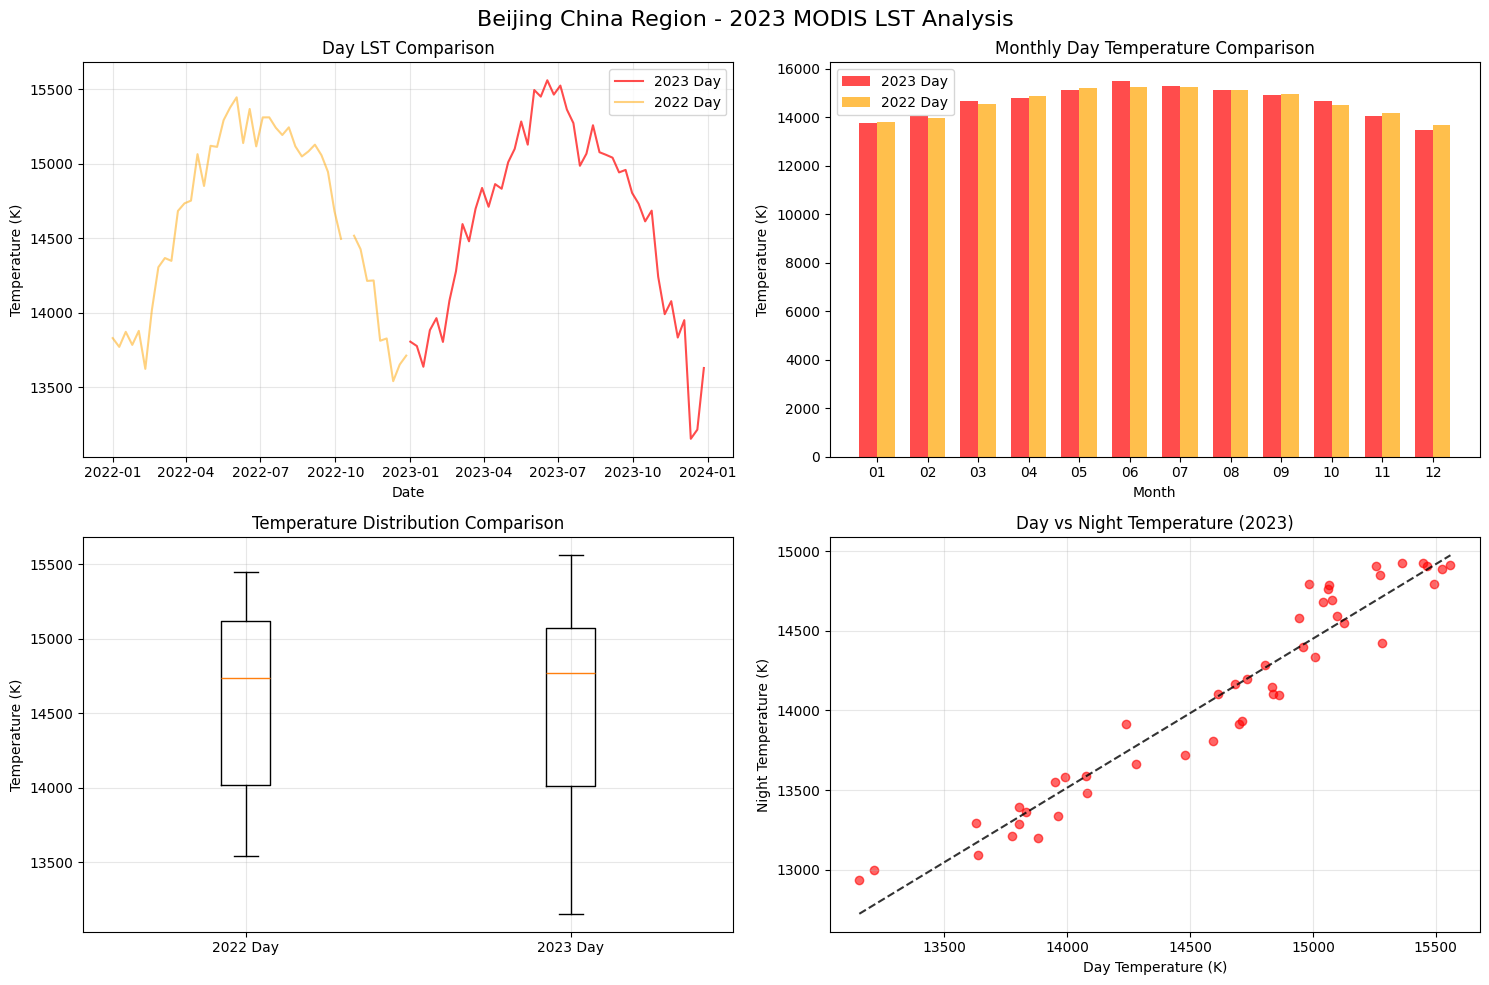

In [124]:
# Visualize Beijing China 2023
if not df_beijing_2023.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Beijing China Region - 2023 MODIS LST Analysis', fontsize=16)

    # Time series comparison
    axes[0, 0].plot(pd.to_datetime(df_beijing_2023['date']), df_beijing_2023['LST_Day_1km_mean'],
                   'b-', alpha=0.7, label='2023 Day', color='red')
    if not df_beijing_2022.empty:
        axes[0, 0].plot(pd.to_datetime(df_beijing_2022['date']), df_beijing_2022['LST_Day_1km_mean'],
                       'g-', alpha=0.5, label='2022 Day', color='orange')
    axes[0, 0].set_title('Day LST Comparison')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Temperature (K)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Monthly comparison
    monthly_2023 = df_beijing_2023.groupby('month').agg({
        'LST_Day_1km_mean': 'mean',
        'LST_Night_1km_mean': 'mean'
    }).reset_index()

    x = np.arange(len(monthly_2023))
    width = 0.35

    axes[0, 1].bar(x - width/2, monthly_2023['LST_Day_1km_mean'], width,
                   label='2023 Day', alpha=0.7, color='red')
    if not df_beijing_2022.empty:
        monthly_2022 = df_beijing_2022.groupby('month').agg({
            'LST_Day_1km_mean': 'mean'
        }).reset_index()
        axes[0, 1].bar(x + width/2, monthly_2022['LST_Day_1km_mean'], width,
                       label='2022 Day', alpha=0.7, color='orange')
    axes[0, 1].set_title('Monthly Day Temperature Comparison')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(monthly_2023['month'])
    axes[0, 1].set_ylabel('Temperature (K)')
    axes[0, 1].legend()

    # Box plot comparison
    temp_data = []
    labels = []
    if not df_beijing_2022.empty:
        temp_data.append(df_beijing_2022['LST_Day_1km_mean'].dropna())
        labels.append('2022 Day')
    temp_data.append(df_beijing_2023['LST_Day_1km_mean'].dropna())
    labels.append('2023 Day')

    axes[1, 0].boxplot(temp_data, labels=labels)
    axes[1, 0].set_title('Temperature Distribution Comparison')
    axes[1, 0].set_ylabel('Temperature (K)')
    axes[1, 0].grid(True, alpha=0.3)

    # Scatter plot: Day vs Night
    axes[1, 1].scatter(df_beijing_2023['LST_Day_1km_mean'], df_beijing_2023['LST_Night_1km_mean'],
                      alpha=0.6, c='red')
    axes[1, 1].set_xlabel('Day Temperature (K)')
    axes[1, 1].set_ylabel('Night Temperature (K)')
    axes[1, 1].set_title('Day vs Night Temperature (2023)')
    axes[1, 1].grid(True, alpha=0.3)

    # Add regression line
    z = np.polyfit(df_beijing_2023['LST_Day_1km_mean'].dropna(),
                   df_beijing_2023['LST_Night_1km_mean'].dropna(), 1)
    p = np.poly1d(z)
    x_range = np.array([df_beijing_2023['LST_Day_1km_mean'].min(),
                       df_beijing_2023['LST_Day_1km_mean'].max()])
    axes[1, 1].plot(x_range, p(x_range), "k--", alpha=0.8)

    plt.tight_layout()
    plt.show()



In [127]:
    # Calculate statistics
    print(f"\n Yearly Statistics:")
    if not df_beijing_2022.empty:
        print(f"2022 Day Mean: {df_beijing_2022['LST_Day_1km_mean'].mean():.2f}K")
    print(f"2023 Day Mean: {df_beijing_2023['LST_Day_1km_mean'].mean():.2f}K")

    # Export to CSV
    df_beijing_2023.to_csv('beijing_china_modis_2023.csv', index=False)
    print(f"\n Data exported to: beijing_china_modis_2023.csv")


 Yearly Statistics:
2022 Day Mean: 14613.81K
2023 Day Mean: 14613.28K

 Data exported to: beijing_china_modis_2023.csv


**2024**

In [128]:
# Beijing China 2024 Data
df_beijing_2024 = get_modis_year_data(
    region_name='Beijing_China',
    region_geom=regions['Beijing_China'],
    year=2024
)

# Explore the data
df_beijing_2024 = explore_dataframe(df_beijing_2024, 'Beijing_China', 2024)



/tmp/ipython-input-1024927158.py:26: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d')



EXPLORING: Beijing_China - Year 2024
Shape: (46, 17)
Date range: 2024-01-01 to 2024-12-26
Number of observations: 46

Missing values per column:

Basic Statistics:
       LST_Day_1km_max  LST_Day_1km_mean  LST_Day_1km_min  LST_Night_1km_max  \
count            46.00             46.00            46.00              46.00   
mean          14887.46          14589.27         14089.78           14443.24   
std             652.03            581.36           589.50             526.23   
min           13733.00          13536.08         12917.00           13624.00   
25%           14300.50          14053.34         13549.00           13954.00   
50%           15045.50          14710.69         14167.50           14519.00   
75%           15474.50          15112.46         14616.50           14928.50   
max           15709.00          15368.09         14925.00           15185.00   

       LST_Night_1km_mean  LST_Night_1km_min  QC_Day_max  QC_Day_mean  \
count               46.00              46

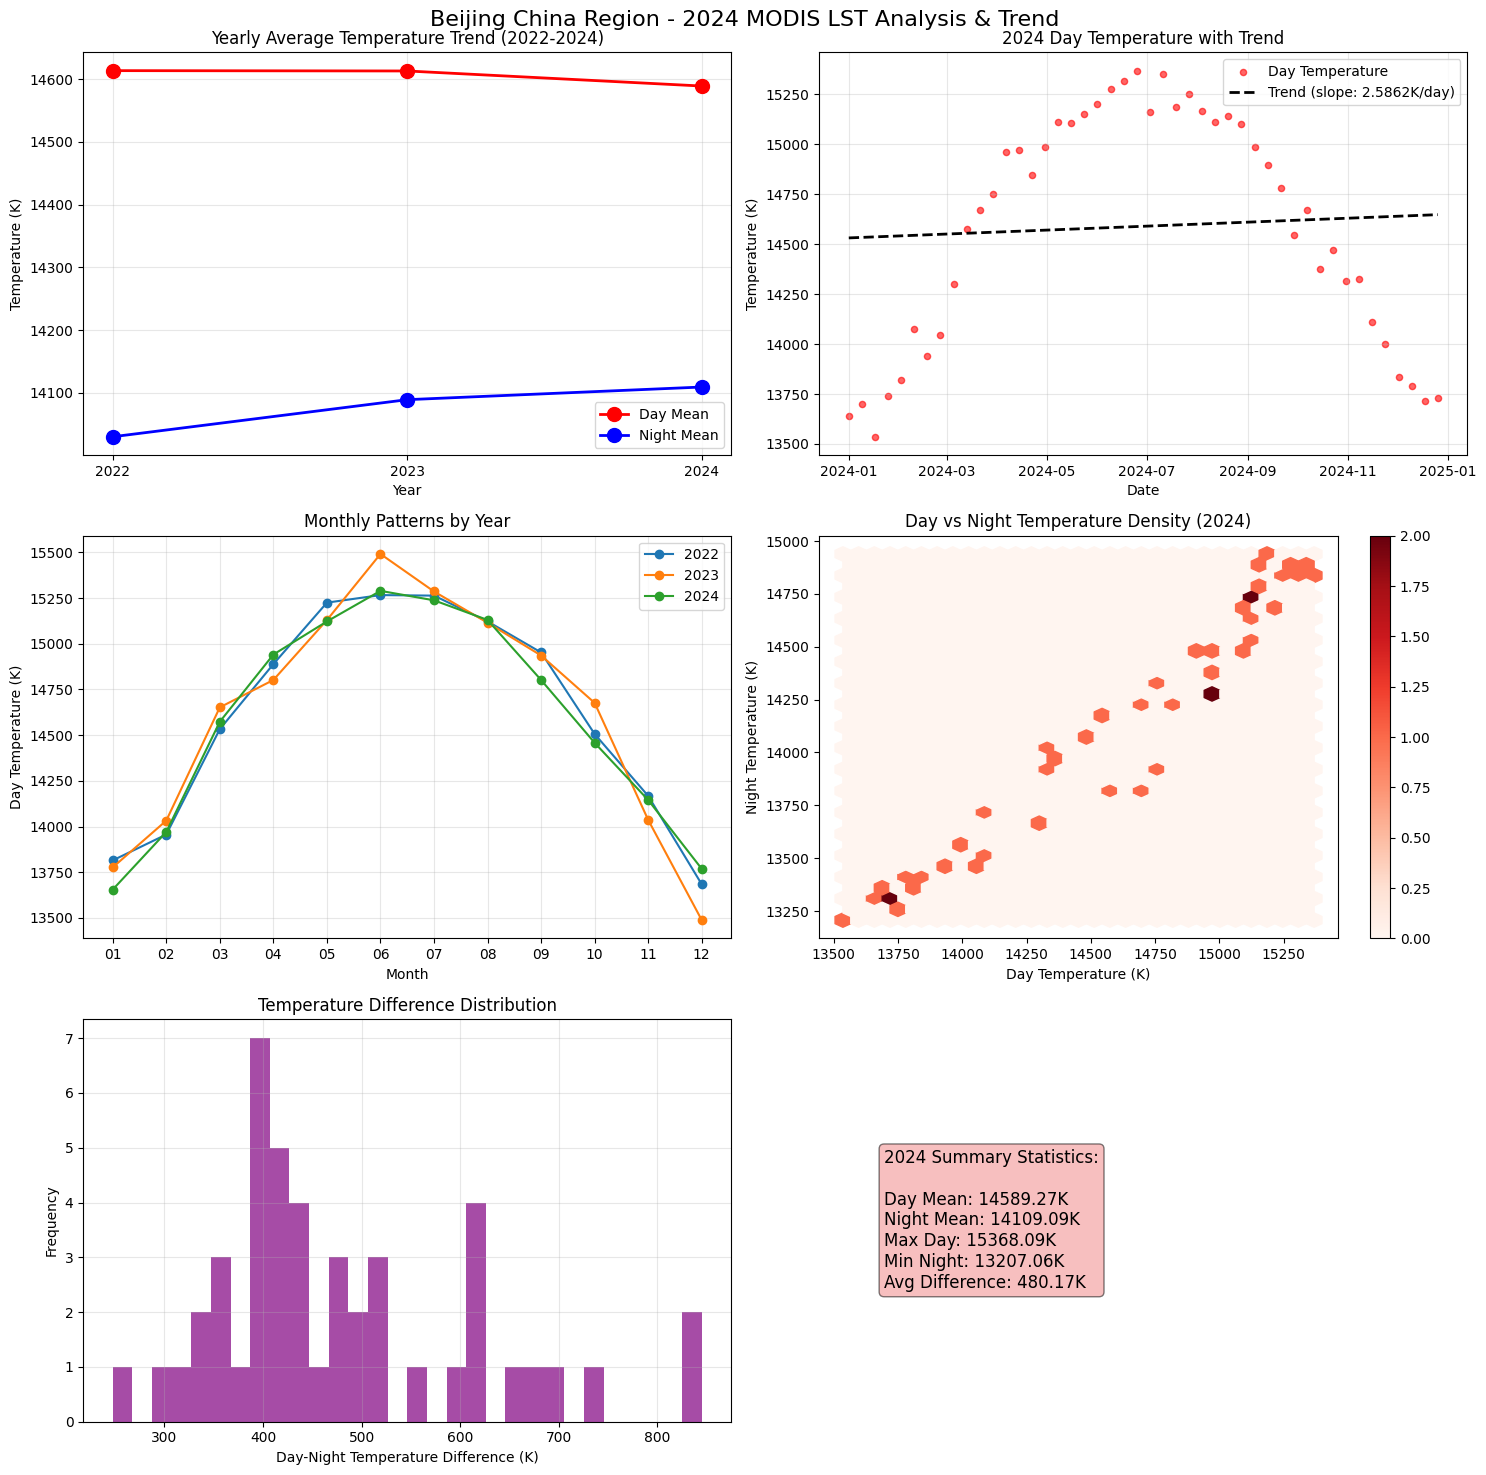

In [129]:
# Visualize Beijing China 2024
if not df_beijing_2024.empty:
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Beijing China Region - 2024 MODIS LST Analysis & Trend', fontsize=16)

    # Collect all years for trend analysis
    all_years_beijing = []
    if not df_beijing_2022.empty:
        df_beijing_2022['year'] = '2022'
        all_years_beijing.append(df_beijing_2022)
    if not df_beijing_2023.empty:
        df_beijing_2023['year'] = '2023'
        all_years_beijing.append(df_beijing_2023)
    if not df_beijing_2024.empty:
        df_beijing_2024['year'] = '2024'
        all_years_beijing.append(df_beijing_2024)

    if all_years_beijing:
        df_all_years_beijing = pd.concat(all_years_beijing, ignore_index=True)

        # Yearly averages trend
        yearly_avg = df_all_years_beijing.groupby('year').agg({
            'LST_Day_1km_mean': 'mean',
            'LST_Night_1km_mean': 'mean'
        }).reset_index()

        axes[0, 0].plot(yearly_avg['year'], yearly_avg['LST_Day_1km_mean'],
                       'ro-', markersize=10, linewidth=2, label='Day Mean')
        axes[0, 0].plot(yearly_avg['year'], yearly_avg['LST_Night_1km_mean'],
                       'bo-', markersize=10, linewidth=2, label='Night Mean')
        axes[0, 0].set_title('Yearly Average Temperature Trend (2022-2024)')
        axes[0, 0].set_xlabel('Year')
        axes[0, 0].set_ylabel('Temperature (K)')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

    # 2024 time series with trend line
    dates_2024 = pd.to_datetime(df_beijing_2024['date'])
    axes[0, 1].scatter(dates_2024, df_beijing_2024['LST_Day_1km_mean'],
                      alpha=0.6, s=20, label='Day Temperature', color='red')

    # Add trend line
    x_numeric = np.arange(len(df_beijing_2024))
    z = np.polyfit(x_numeric, df_beijing_2024['LST_Day_1km_mean'].dropna(), 1)
    p = np.poly1d(z)
    axes[0, 1].plot(dates_2024, p(x_numeric), "k--", linewidth=2,
                   label=f'Trend (slope: {z[0]:.4f}K/day)')

    axes[0, 1].set_title('2024 Day Temperature with Trend')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Temperature (K)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Seasonal pattern (monthly averages for all available years)
    if 'df_all_years_beijing' in locals():
        monthly_all_years = df_all_years_beijing.groupby(['year', 'month']).agg({
            'LST_Day_1km_mean': 'mean'
        }).reset_index()

        for year in monthly_all_years['year'].unique():
            year_data = monthly_all_years[monthly_all_years['year'] == year]
            axes[1, 0].plot(year_data['month'], year_data['LST_Day_1km_mean'],
                          'o-', label=f'{year}')

        axes[1, 0].set_title('Monthly Patterns by Year')
        axes[1, 0].set_xlabel('Month')
        axes[1, 0].set_ylabel('Day Temperature (K)')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # Heatmap of day vs night temperature
    heatmap_data = df_beijing_2024[['LST_Day_1km_mean', 'LST_Night_1km_mean']].dropna()
    axes[1, 1].hexbin(heatmap_data['LST_Day_1km_mean'],
                     heatmap_data['LST_Night_1km_mean'],
                     gridsize=30, cmap='Reds')
    axes[1, 1].set_xlabel('Day Temperature (K)')
    axes[1, 1].set_ylabel('Night Temperature (K)')
    axes[1, 1].set_title('Day vs Night Temperature Density (2024)')
    plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])

    # Temperature difference analysis
    df_beijing_2024['temp_diff'] = df_beijing_2024['LST_Day_1km_mean'] - df_beijing_2024['LST_Night_1km_mean']
    axes[2, 0].hist(df_beijing_2024['temp_diff'].dropna(), bins=30, alpha=0.7, color='purple')
    axes[2, 0].set_xlabel('Day-Night Temperature Difference (K)')
    axes[2, 0].set_ylabel('Frequency')
    axes[2, 0].set_title('Temperature Difference Distribution')
    axes[2, 0].grid(True, alpha=0.3)

    # Summary statistics table
    stats_text = "2024 Summary Statistics:\n\n"
    stats_text += f"Day Mean: {df_beijing_2024['LST_Day_1km_mean'].mean():.2f}K\n"
    stats_text += f"Night Mean: {df_beijing_2024['LST_Night_1km_mean'].mean():.2f}K\n"
    stats_text += f"Max Day: {df_beijing_2024['LST_Day_1km_mean'].max():.2f}K\n"
    stats_text += f"Min Night: {df_beijing_2024['LST_Night_1km_mean'].min():.2f}K\n"
    stats_text += f"Avg Difference: {df_beijing_2024['temp_diff'].mean():.2f}K"

    axes[2, 1].text(0.1, 0.5, stats_text, fontsize=12,
                   verticalalignment='center',
                   bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
    axes[2, 1].axis('off')

    plt.tight_layout()
    plt.show()


In [130]:

    # Export to CSV
    df_beijing_2024.to_csv('beijing_china_modis_2024.csv', index=False)
    print(f"\n Data exported to: beijing_china_modis_2024.csv")

    # Print trend analysis
    if len(all_years_beijing) >= 2:
        print(f"\n Temperature Trend Analysis (2022-2024):")
        for idx, year_df in enumerate(all_years_beijing):
            year = year_df['year'].iloc[0] if 'year' in year_df.columns else f"Year {idx+2022}"
            print(f"{year}: Day Avg = {year_df['LST_Day_1km_mean'].mean():.2f}K")


 Data exported to: beijing_china_modis_2024.csv

 Temperature Trend Analysis (2022-2024):
2022: Day Avg = 14613.81K
2023: Day Avg = 14613.28K
2024: Day Avg = 14589.27K


**Combine All Years**

In [131]:
# Combine all Beijing China years into one DataFrame
df_beijing_all_years = pd.concat([
    df_beijing_2022,
    df_beijing_2023,
    df_beijing_2024
], ignore_index=True)

# Sort by date
df_beijing_all_years['date_dt'] = pd.to_datetime(df_beijing_all_years['date'])
df_beijing_all_years = df_beijing_all_years.sort_values('date_dt')

print(f"\n{'='*60}")
print(f"FINAL COMBINED DATASET: BEIJING CHINA")
print(f"{'='*60}")
print(f"Total records: {len(df_beijing_all_years):,}")
print(f"Date range: {df_beijing_all_years['date'].min()} to {df_beijing_all_years['date'].max()}")
print(f"Years covered: {sorted(df_beijing_all_years['year'].unique())}")
print(f"Columns: {df_beijing_all_years.columns.tolist()}")

# Save the combined dataset
df_beijing_all_years.to_csv('beijing_china_modis_all_years.csv', index=False)
print(f"\n Combined data exported to: beijing_china_modis_all_years.csv")

print(f"\n Beijing China analysis complete! Key files created:")
print("   - beijing_china_modis_2022.csv")
print("   - beijing_china_modis_2023.csv")
print("   - beijing_china_modis_2024.csv")
print("   - beijing_china_modis_all_years.csv")


FINAL COMBINED DATASET: BEIJING CHINA
Total records: 138
Date range: 2022-01-01 to 2024-12-26
Years covered: ['2022', '2023', '2024']
Columns: ['LST_Day_1km_max', 'LST_Day_1km_mean', 'LST_Day_1km_min', 'LST_Night_1km_max', 'LST_Night_1km_mean', 'LST_Night_1km_min', 'QC_Day_max', 'QC_Day_mean', 'QC_Day_min', 'QC_Night_max', 'QC_Night_mean', 'QC_Night_min', 'date', 'region', 'satellite', 'year', 'month', 'temp_diff', 'date_dt']

 Combined data exported to: beijing_china_modis_all_years.csv

 Beijing China analysis complete! Key files created:
   - beijing_china_modis_2022.csv
   - beijing_china_modis_2023.csv
   - beijing_china_modis_2024.csv
   - beijing_china_modis_all_years.csv
